In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [2]:
df = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [3]:
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
df.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [5]:
df.shape

(187, 1)

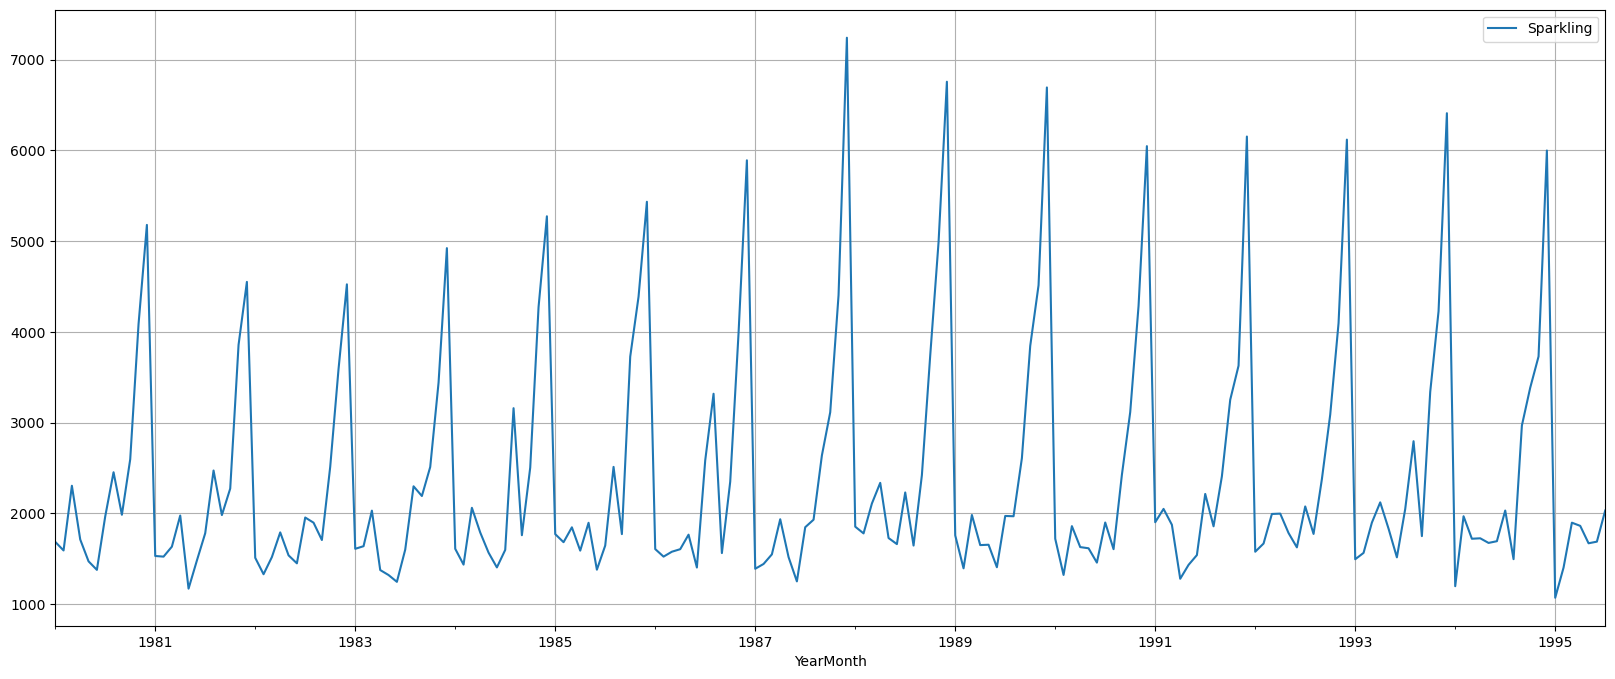

In [6]:
df.plot(figsize=(20,8))
plt.grid();

In [7]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5

In [8]:
df.columns=['Sales', 'Year', 'Month']
df.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [9]:
df.tail()

Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-05-01   1670  1995      5
1995-06-01   1688  1995      6
1995-07-01   2031  1995      7

In [10]:
df.shape

(187, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   187 non-null    int64
 1   Year    187 non-null    int32
 2   Month   187 non-null    int32
dtypes: int32(2), int64(1)
memory usage: 4.4 KB


In [12]:
round(df.describe().T)

count    mean     std     min     25%     50%     75%     max
Sales  187.0  2402.0  1295.0  1070.0  1605.0  1874.0  2549.0  7242.0
Year   187.0  1987.0     5.0  1980.0  1983.0  1987.0  1991.0  1995.0
Month  187.0     6.0     3.0     1.0     3.0     6.0     9.0    12.0

In [13]:
df.isnull().sum()

Sales    0
Year     0
Month    0
dtype: int64

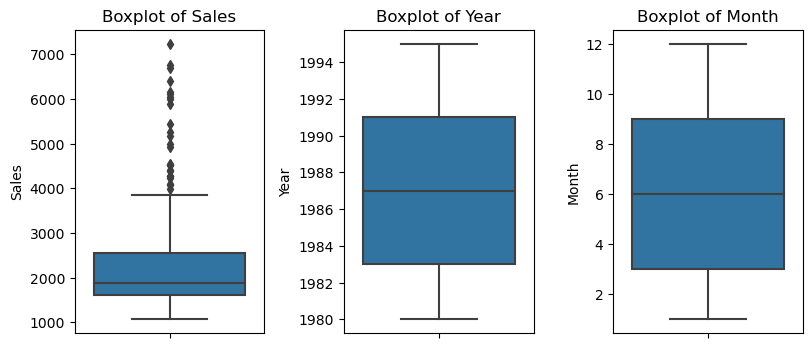

In [14]:
dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<Axes: xlabel='YearMonth'>

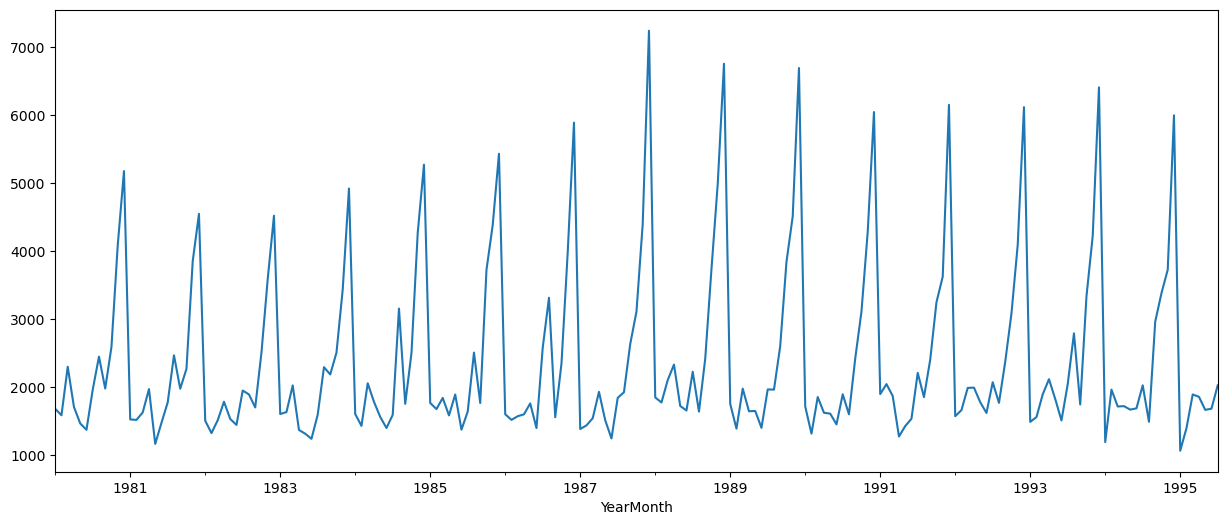

In [15]:
plt.figure(figsize=(15,6))
df['Sales'].plot()

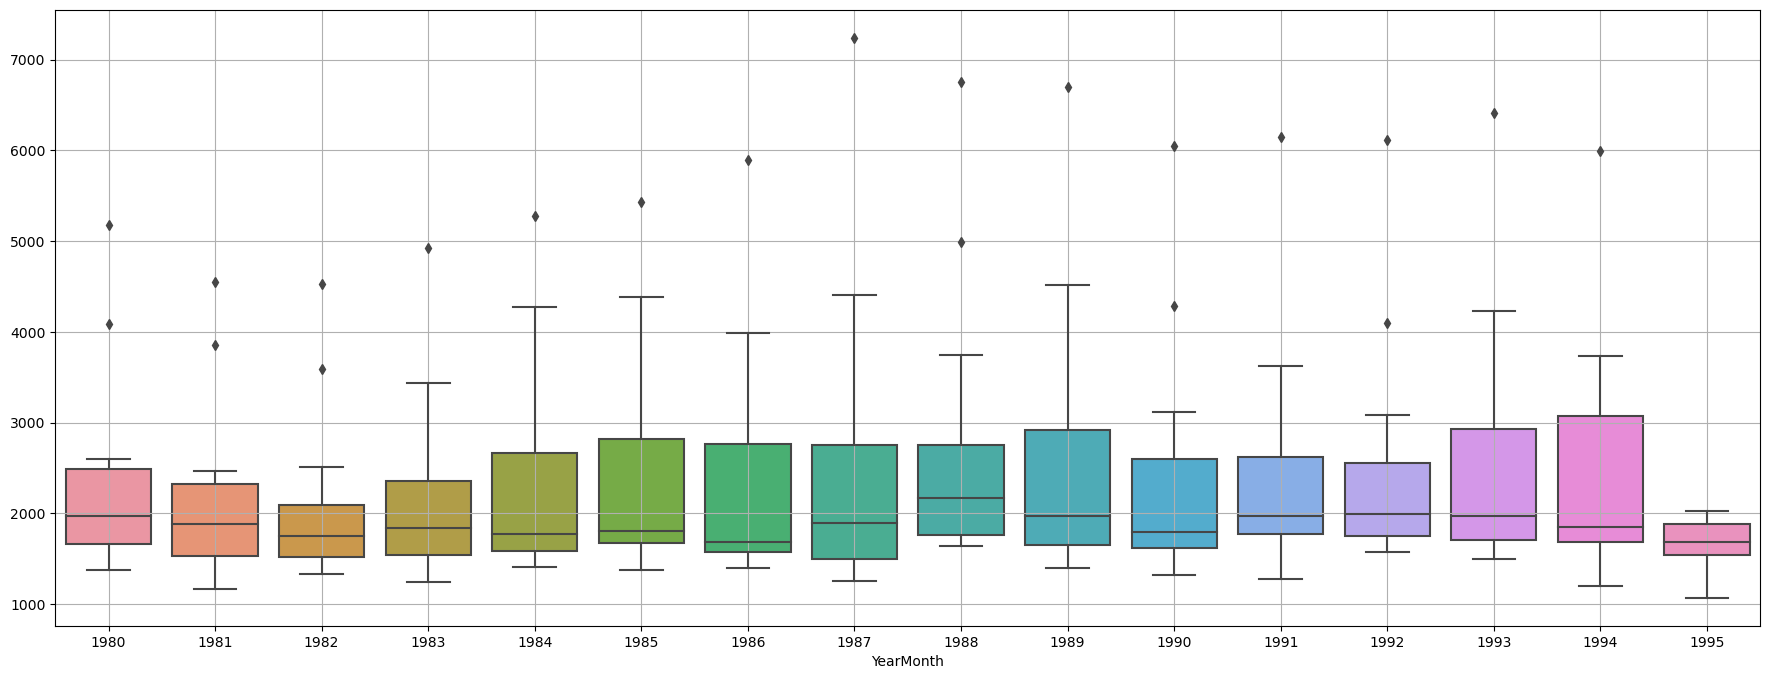

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

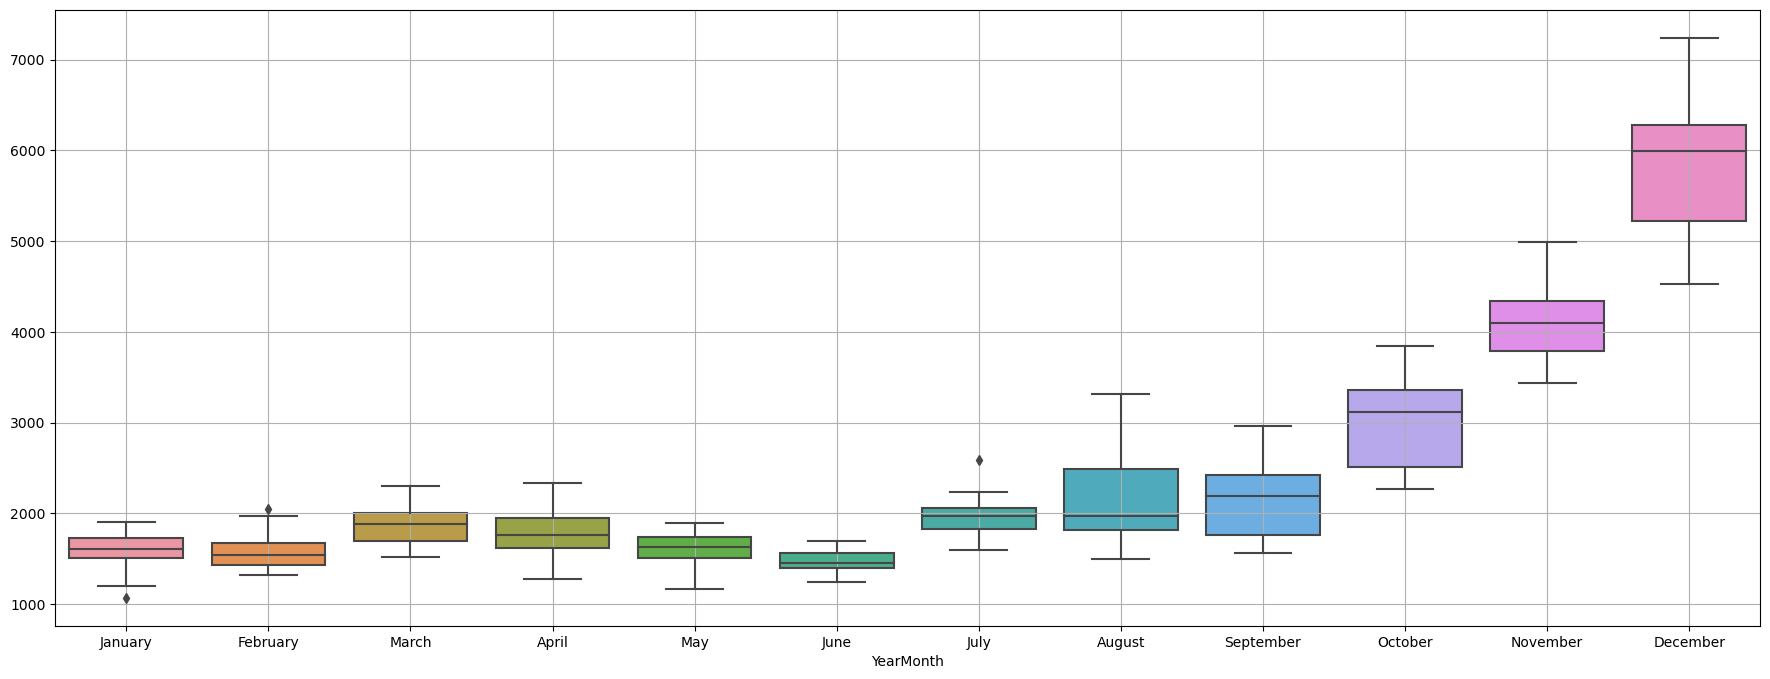

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

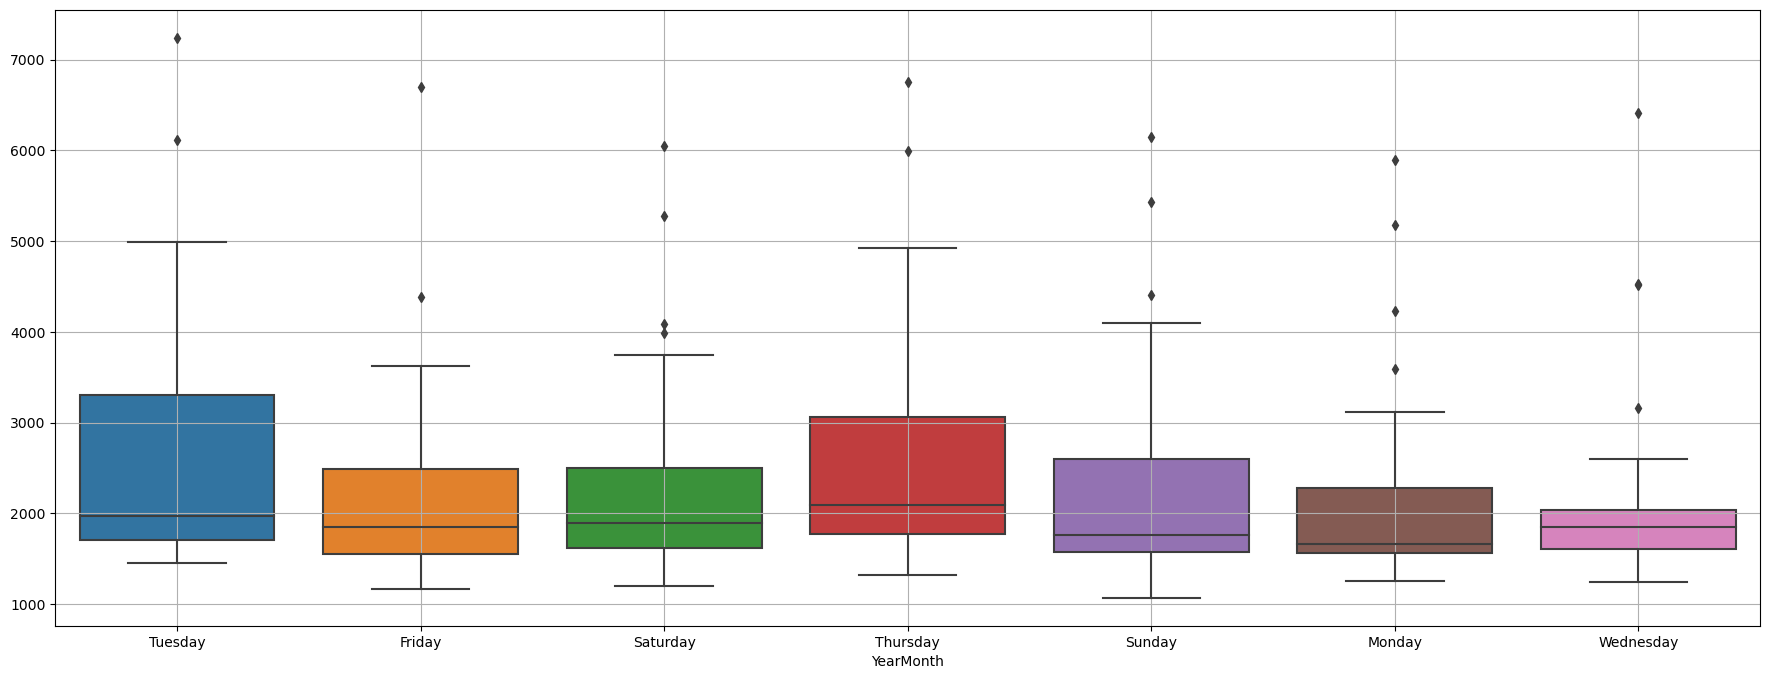

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.day_name(),y = df.values[:,0],ax=ax)
plt.grid();

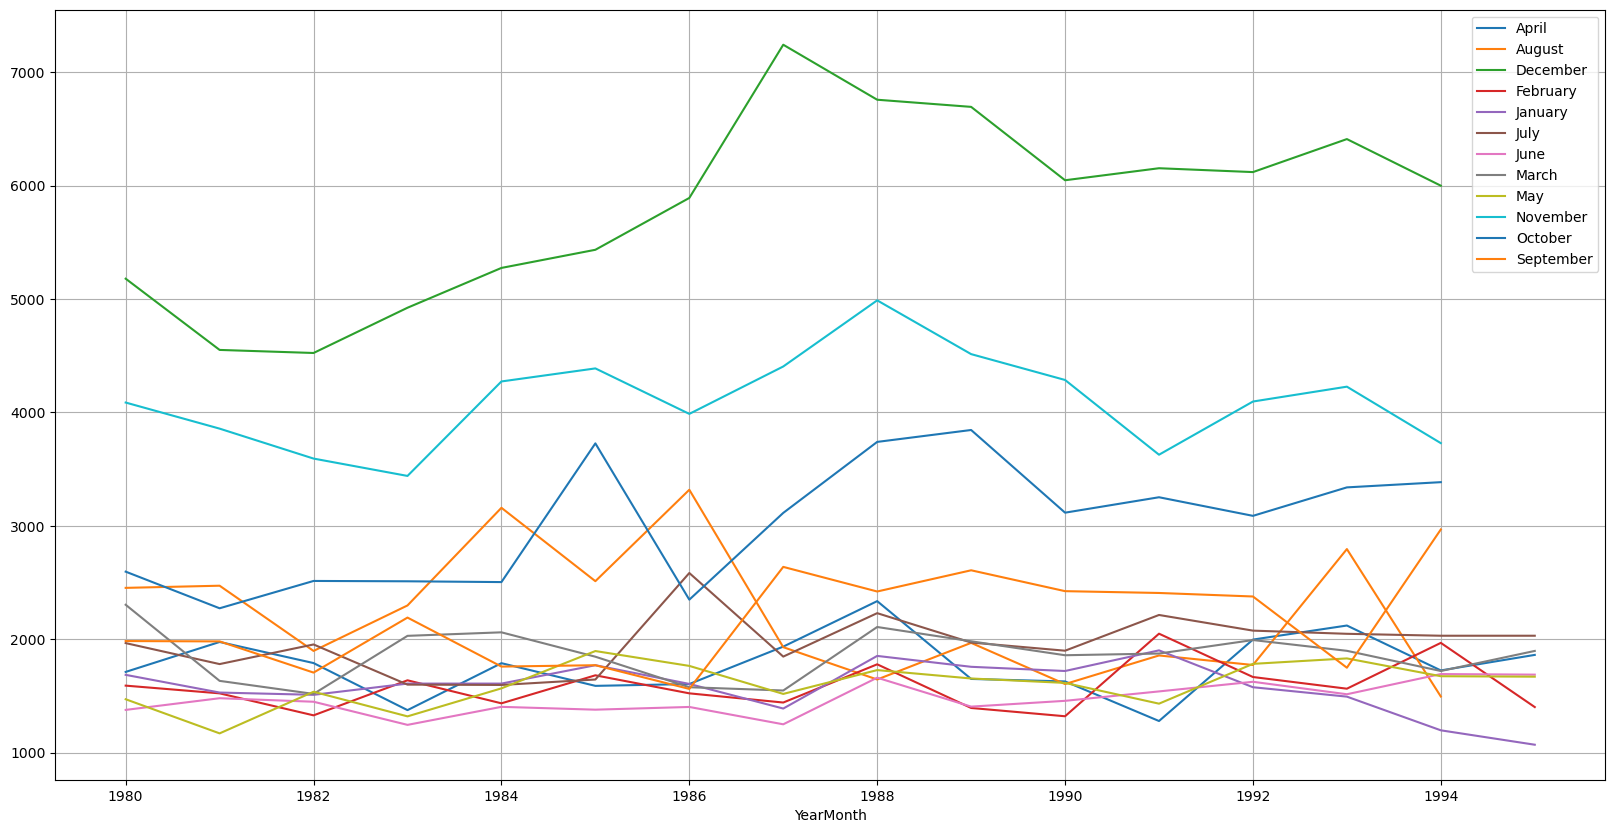

In [19]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

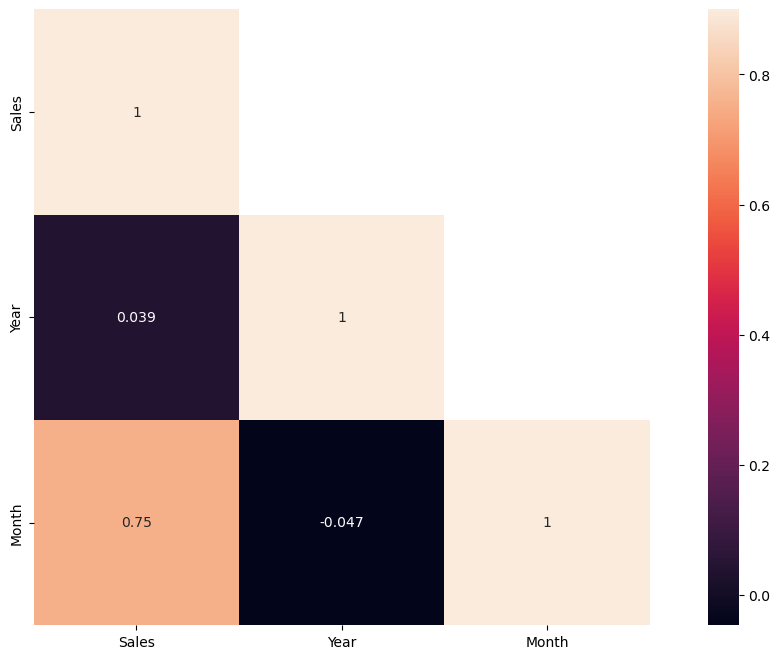

In [20]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

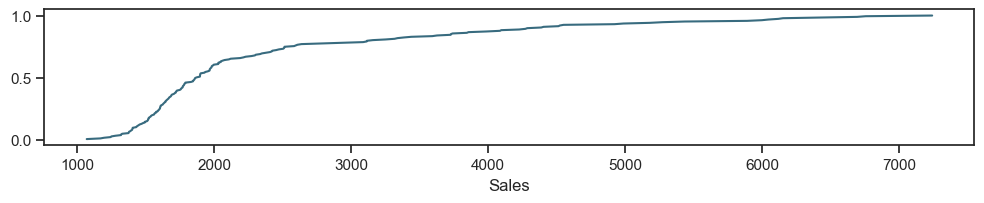

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF
sns.set(style = "ticks")
c = '#386B7F' 
plt.figure(figsize = (12, 6))
plt.subplot(312)
cdf = ECDF(df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

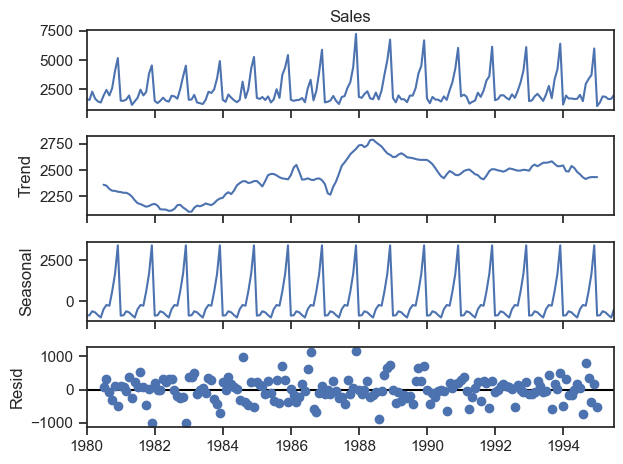

In [22]:
decomposition = seasonal_decompose(df['Sales'],model='additive')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


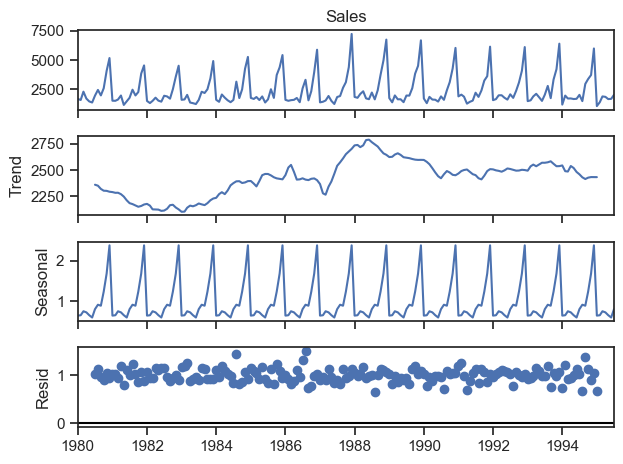

In [24]:
decomposition = seasonal_decompose(df['Sales'],model='multiplicative')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [26]:
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [27]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5 

Last few rows of Training Data 
             Sales  Year  Month
YearMonth                     
1990-08-01   1605  1990      8
1990-09-01   2424  1990      9
1990-10-01   3116  1990     10
1990-11-01   4286  1990     11
1990-12-01   6047  1990     12 

First few rows of Test Data 
             Sales  Year  Month
YearMonth                     
1991-01-01   1902  1991      1
1991-02-01   2049  1991      2
1991-03-01   1874  1991      3
1991-04-01   1279  1991      4
1991-05-01   1432  1991      5 

Last few rows of Test Data 
             Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-0

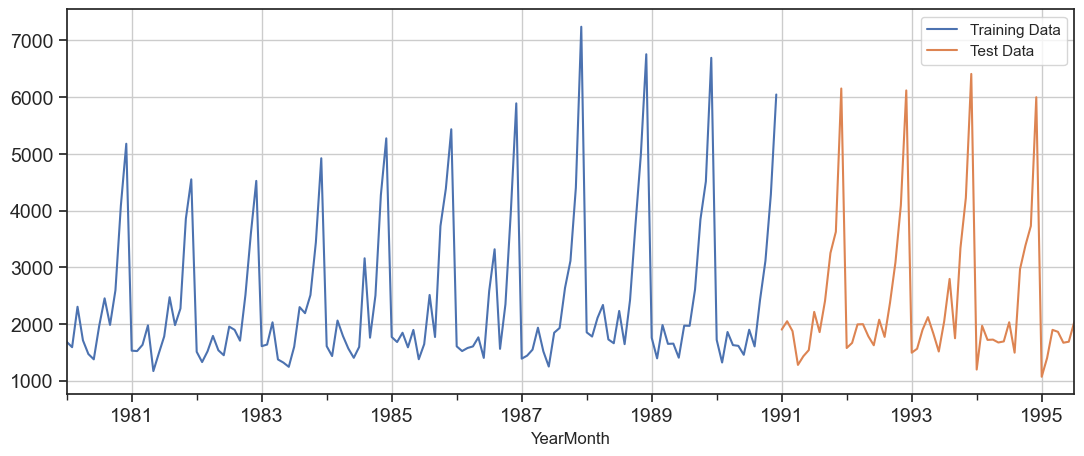

In [28]:
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [29]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [30]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [31]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

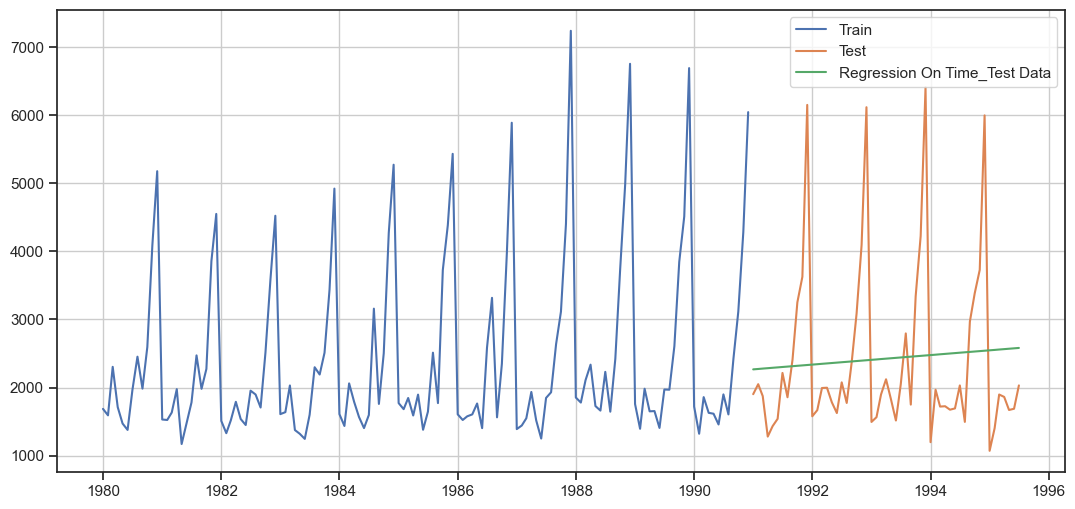

In [32]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [33]:
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  1275.867052

In [34]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [35]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

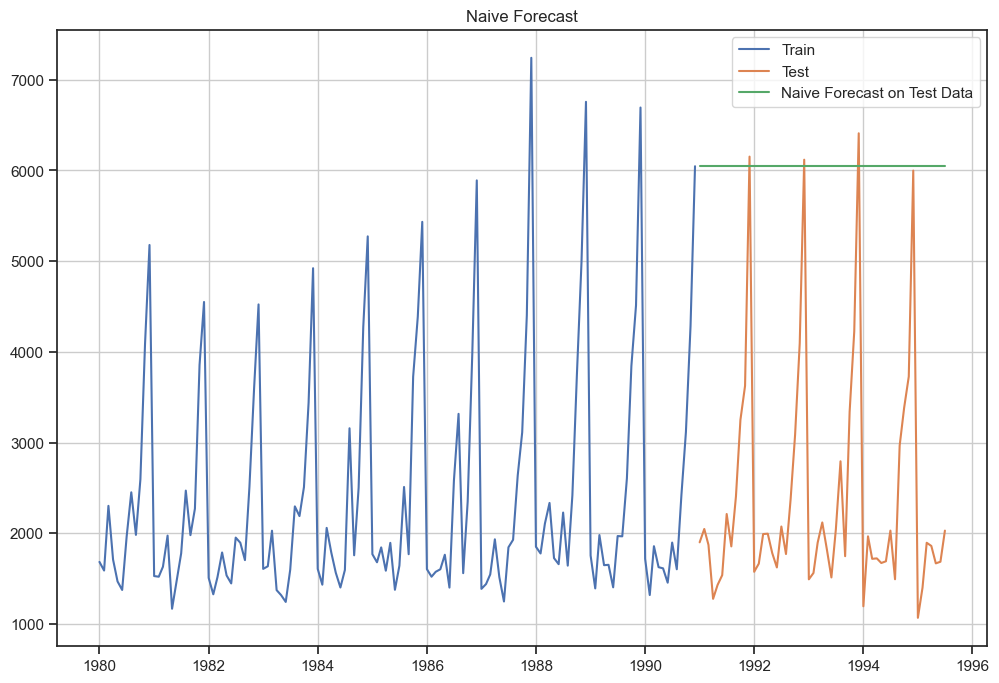

In [36]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [37]:
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  1275.867052
Naive Model        3864.279352

In [38]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [39]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Sales  Year  Month  mean_forecast
YearMonth                                    
1991-01-01   1902  1991      1    2403.780303
1991-02-01   2049  1991      2    2403.780303
1991-03-01   1874  1991      3    2403.780303
1991-04-01   1279  1991      4    2403.780303
1991-05-01   1432  1991      5    2403.780303

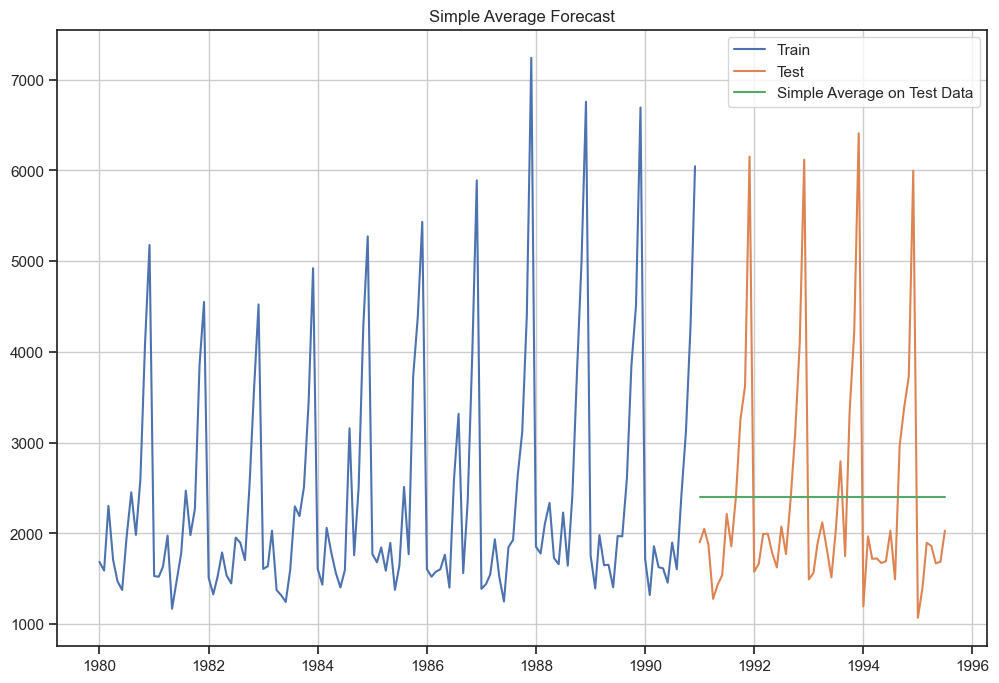

In [40]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [41]:
rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression     1275.867052
Naive Model           3864.279352
Simple Average Model  1275.081804

In [42]:
MovingAverage = df.copy()
MovingAverage.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [43]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()
MovingAverage.head()

Sales  Year  Month  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01-01   1686  1980      1         NaN         NaN         NaN         NaN
1980-02-01   1591  1980      2      1638.5         NaN         NaN         NaN
1980-03-01   2304  1980      3      1947.5         NaN         NaN         NaN
1980-04-01   1712  1980      4      2008.0     1823.25         NaN         NaN
1980-05-01   1471  1980      5      1591.5     1769.50         NaN         NaN

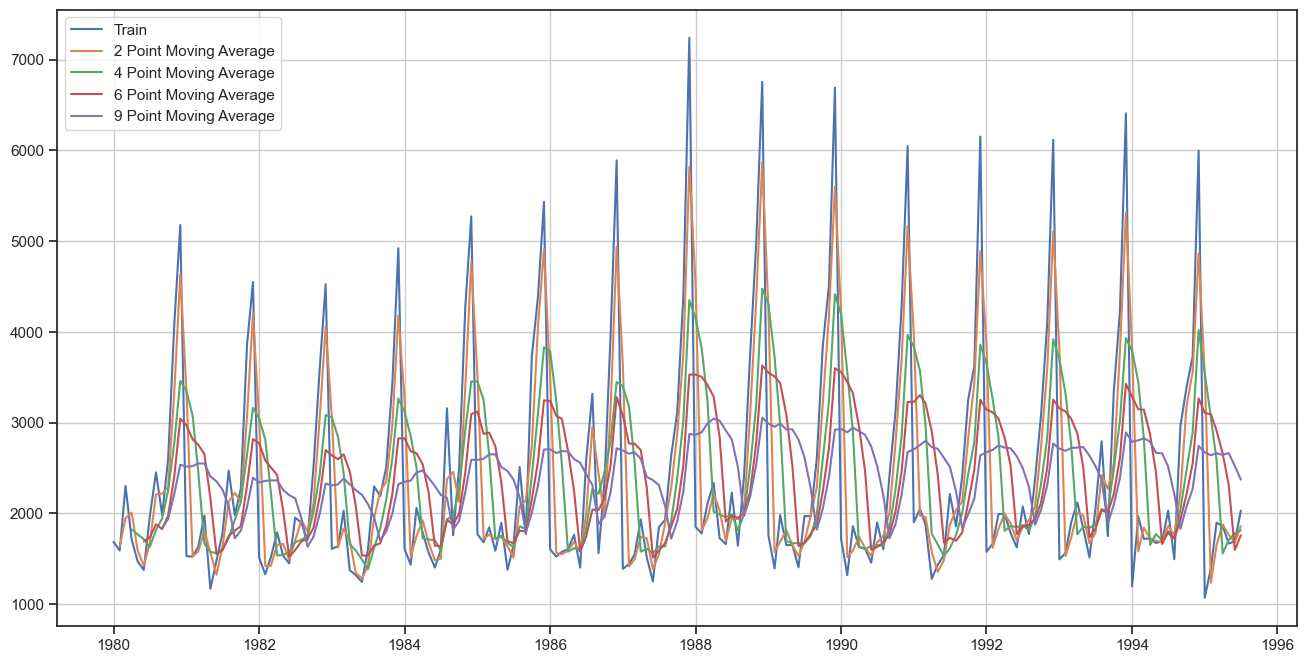

In [44]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [45]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


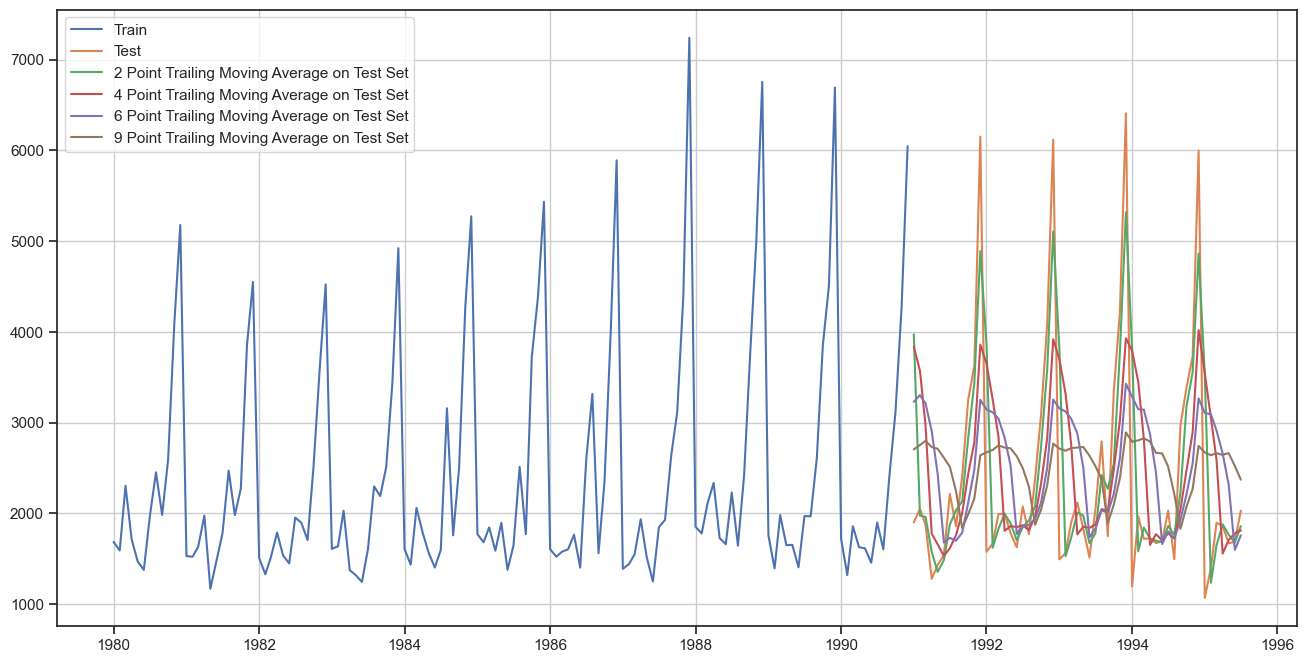

In [46]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [47]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [48]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            1275.867052
Naive Model                  3864.279352
Simple Average Model         1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

In [49]:
SES_train = train.copy()
SES_test = test.copy()

In [50]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
model_SES_autofit = model_SES.fit(optimized=True)

In [52]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [53]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [54]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  2676.676366
1991-02-01   2049  1991      2  2676.676366
1991-03-01   1874  1991      3  2676.676366
1991-04-01   1279  1991      4  2676.676366
1991-05-01   1432  1991      5  2676.676366

In [55]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp._append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

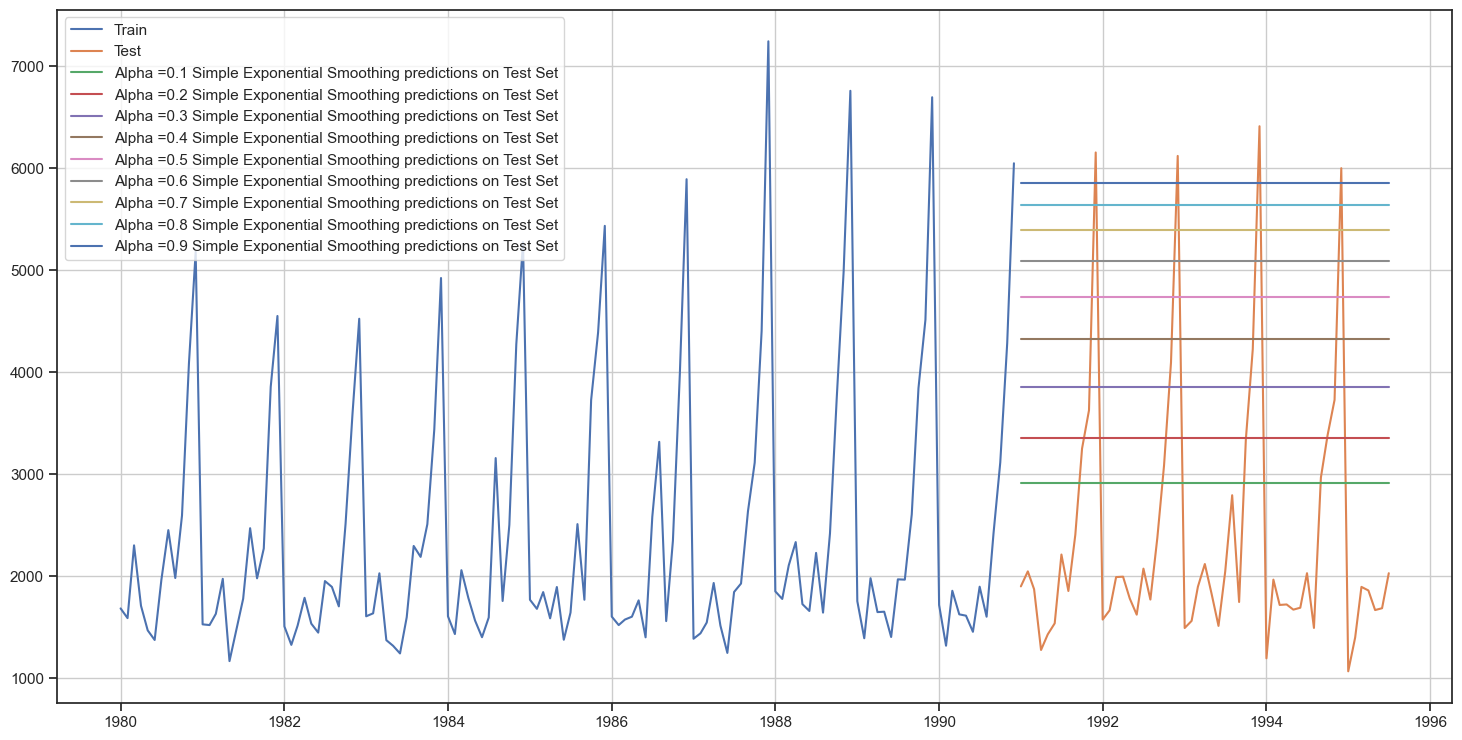

In [56]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [57]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

In [58]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                     1275.867052
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2pointTrailingMovingAverage            813.400684
4pointTrailingMovingAverage           1156.589694
6pointTrailingMovingAverage           1283.927428
9pointTrailingMovingAverage           1346.278315
Alpha=0.1,SimpleExponentialSmoothing  1375.393398

In [59]:
DES_train = train.copy()
DES_test = test.copy()

In [60]:
model_DES = Holt(DES_train['Sales'])

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [61]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  5221.278699
1991-02-01   2049  1991      2  5127.886554
1991-03-01   1874  1991      3  5034.494409
1991-04-01   1279  1991      4  4941.102264
1991-05-01   1432  1991      5  4847.710119

In [63]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [64]:
rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [65]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6._append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDf_6

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

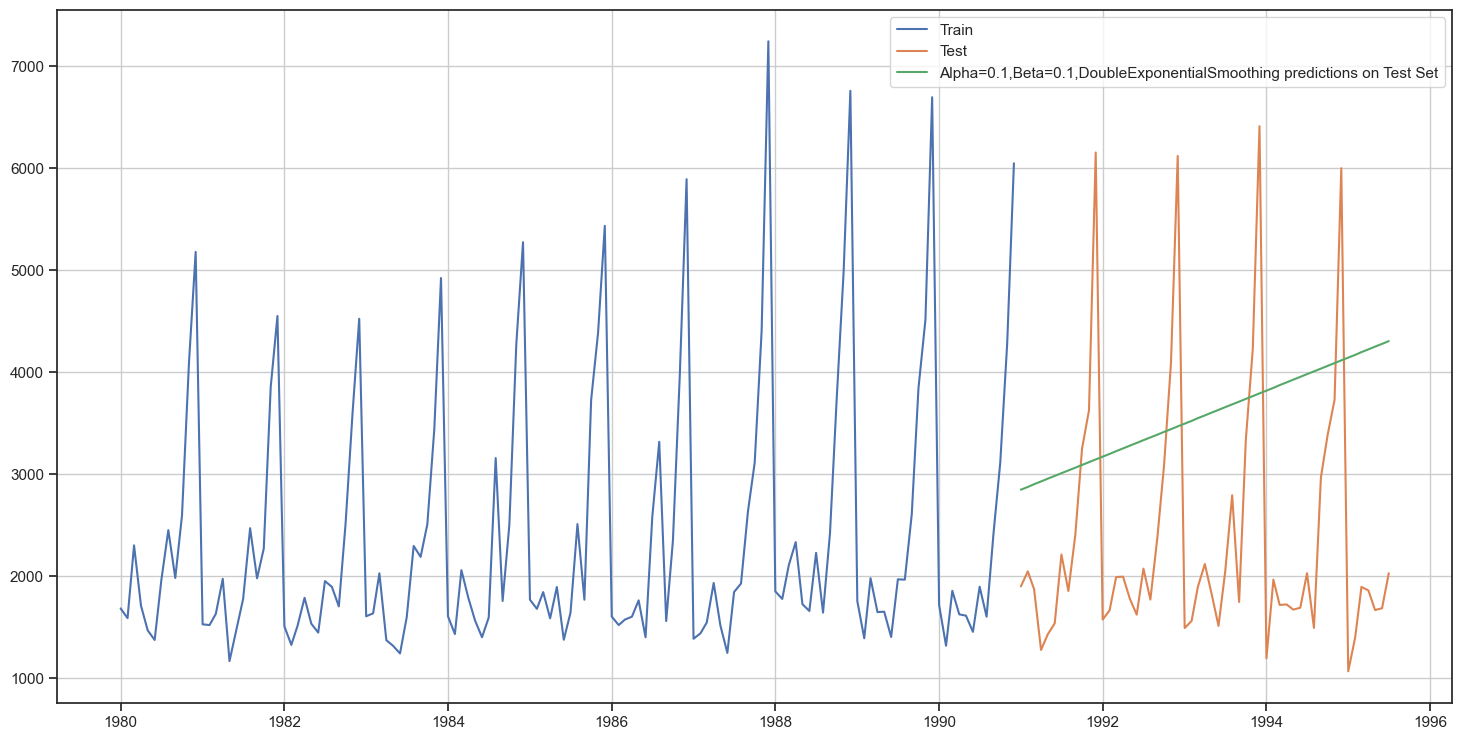

In [66]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [67]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

In [68]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670

In [69]:
TES_train = train.copy()
TES_test = test.copy()

In [70]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [71]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [72]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [73]:
resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [74]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.10005373820823961,
 'smoothing_trend': 0.010034490652580457,
 'smoothing_seasonal': 0.5095957543425532,
 'damping_trend': nan,
 'initial_level': 2364.584774604334,
 'initial_trend': -0.016752880078245408,
 'initial_seasons': array([-653.82559323, -736.67734144, -368.25456128, -483.63906084,
        -826.15467946, -832.96819741, -386.3751117 ,   91.82676187,
        -261.32455153,  265.38968222, 1580.26233564, 2619.56221896]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [75]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.11194572287706502,
 'smoothing_trend': 0.04979454913988668,
 'smoothing_seasonal': 0.3616765678435302,
 'damping_trend': nan,
 'initial_level': 2356.340229937152,
 'initial_trend': -10.519480221963526,
 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
        0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
        1.8820382 , 2.38194187]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.11107183603403979,
 'smoothing_trend': 0.049365284578820307,
 'smoothing_seasonal': 0.3621558008016758,
 'damping_trend': nan,
 'initial_level': 2356.54182683837,
 'initial_trend': 0.9987335327035919,
 'initial_seasons': array([0.73149822, 0.69744833, 0.89840537, 0.80865735, 0.66719269,
        0.6681085 , 0.87715674, 1.11429125, 0.9150789 , 1.18066449,
        1.84461049, 2.34299132]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.11107142866032142,
 'smoothing_trend': 0.012341269861019839,
 'smoothing_seasonal': 0.4609259258337408,
 'damping_trend': nan,
 'initial_level': 2356.541666688765,
 'initial_trend': 1.003171553192385,
 'initial_seasons': array([-636.18663196, -722.94704863, -398.70746525, -473.40538195,
        -808.38454863, -815.31163196, -384.22829861,   72.94878474,
        -237.3949653 ,  272.33420139, 1541.2821181 , 2590.00086809]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa
YearMonth                                    
1991-01-01   1902  1991      1    1509.969093
1991-02-01   2049  1991      2    1205.343244
1991-03-01   1874  1991      3    1702.386113
1991-04-01   1279  1991      4    1548.514691
1991-05-01   1432  1991      5    1467.824074

In [79]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01   1902  1991      1    1509.969093    1586.782642
1991-02-01   2049  1991      2    1205.343244    1355.896477
1991-03-01   1874  1991      3    1702.386113    1762.095344
1991-04-01   1279  1991      4    1548.514691    1655.471900
1991-05-01   1432  1991      5    1467.824074    1541.320914

In [80]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01   1902  1991      1    1509.969093    1586.782642    1591.473305
1991-02-01   2049  1991      2    1205.343244    1355.896477    1360.492250
1991-03-01   1874  1991      3    1702.386113    1762.095344    1768.009110
1991-04-01   1279  1991      4    1548.514691    1655.471900    1661.678682
1991-05-01   1432  1991      5    1467.824074    1541.320914    1547.447439

In [81]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01   1902  1991      1    1509.969093    1586.782642    1591.473305   
1991-02-01   2049  1991      2    1205.343244    1355.896477    1360.492250   
1991-03-01   1874  1991      3    1702.386113    1762.095344    1768.009110   
1991-04-01   1279  1991      4    1548.514691    1655.471900    1661.678682   
1991-05-01   1432  1991      5    1467.824074    1541.320914    1547.447439   

            predict_tm_sa  
YearMonth                  
1991-01-01    1511.756579  
1991-02-01    1227.680658  
1991-03-01    1713.866726  
1991-04-01    1578.252255  
1991-05-01    1490.255624

In [82]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 379.696
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 406.510
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 380.386
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 354.454


In [83]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405

In [84]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [86]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)

In [87]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)

In [88]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [89]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [90]:
TES_test.head()

Sales  Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                        
1991-01-01   1902  1991      1                     1671.894991   
1991-02-01   2049  1991      2                     1535.938082   
1991-03-01   1874  1991      3                     1882.992874   
1991-04-01   1279  1991      4                     1798.243923   
1991-05-01   1432  1991      5                     1576.572747   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                     1540.529588   
1991-02-01                     1354.094081   
1991-03-01                     1728.658127   
1991-04-01                     1638.281580   
1991-05-01                     1470.697707   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1472.827405   
1991-02-01                                     1236.723426   
1991-03-01                                     1644.294990   
1991-04-01                                     1535.922824   
1991-05-01                                     1394.544409   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                     1444.947521                     1440.100315   
1991-02-01                     1163.127303                     1118.381068   
1991-03-01                     1605.772780                     1593.658780   
1991-04-01                     1469.062420                     1424.230588   
1991-05-01                     1347.223962                     1324.218679   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                     1446.456719   
1991-02-01                     1091.681321   
1991-03-01                     1593.602194   
1991-04-01                     1393.229741   
1991-05-01                     1318.006765   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-01                                    1456.102126  ...   
1991-02-01                                    1075.381082  ...   
1991-03-01                                    1595.700721  ...   
1991-04-01                                    1370.975056  ...   
1991-05-01                                    1319.843928  ...   

            (predict_tm_sa, 0.9, 0.8, 0.9)  (predict_tm_sa, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-01                   -5.868610e+20                     1681.548575   
1991-02-01                   -1.101754e+23                     2493.688129   
1991-03-01                   -4.674701e+24                     3209.508652   
1991-04-01                   -5.266723e+25                     3046.434803   
1991-05-01                   -1.636152e+26                     2755.658417   

            (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-01                     1003.861817   
1991-02-01                     1469.309964   
1991-03-01                     2499.957287   
1991-04-01                     2171.122226   
1991-05-01                     1623.114204   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1011.116778   
1991-02-01                                     1145.238568   
1991-03-01                                     2962.569457   
1991-04-01                                     3050.550334   
1991-05-01                                     2612.626803   

            (predict_tm_sa, 0.9, 0.9, 0.4)  (predict_tm_sa, 0.9, 0.9, 0.5)  \
YearMonth                                                                  

In [91]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE Method
2301           0.4          0.1           0.2  384.467709  317.434302  ta_sm
3245           0.4          0.1           0.3  381.106645  326.579641  tm_sm
2211           0.3          0.2           0.2  388.544148  329.037543  ta_sm
2200           0.3          0.1           0.1  388.220071  337.080969  ta_sm
2110           0.2          0.2           0.1  398.482510  340.186457  ta_sm

In [92]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302

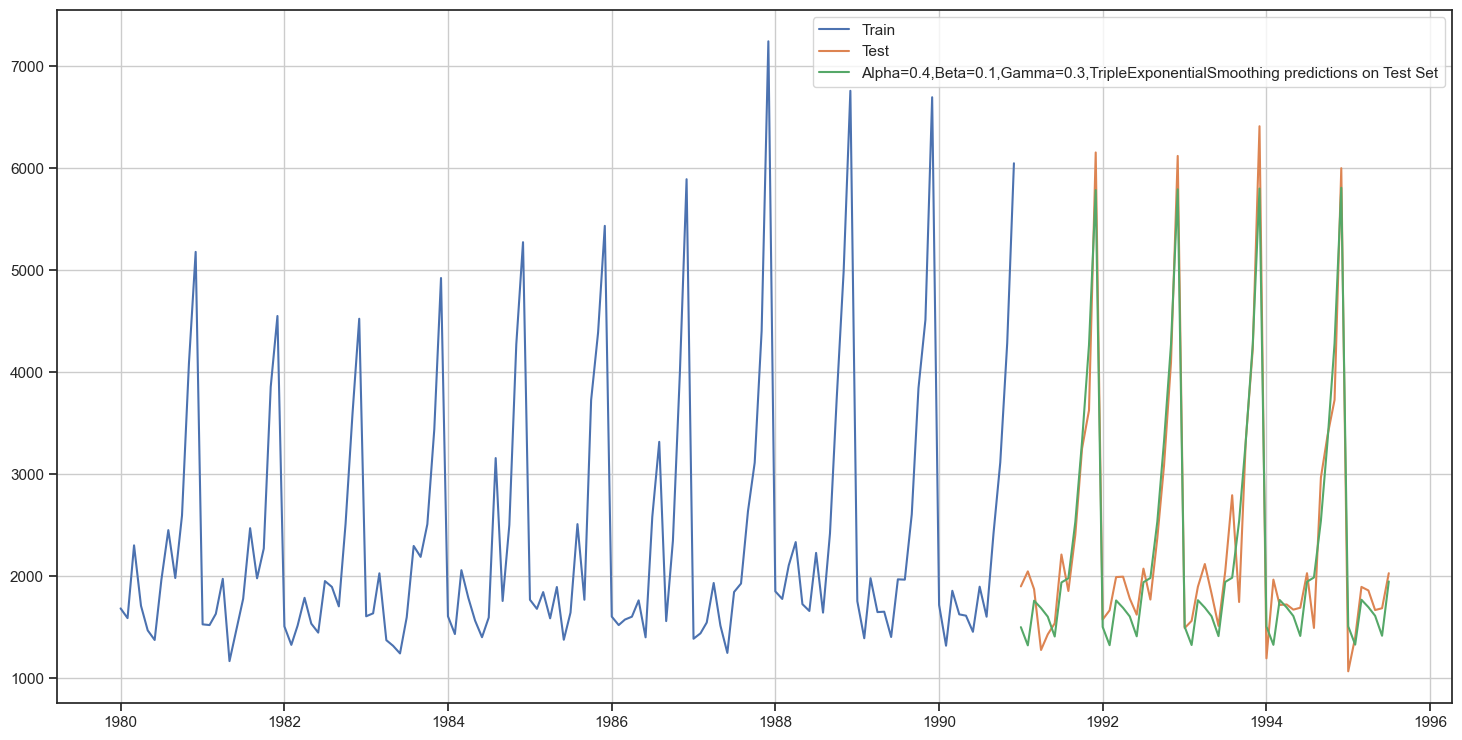

In [93]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [94]:
from statsmodels.tsa.stattools import adfuller

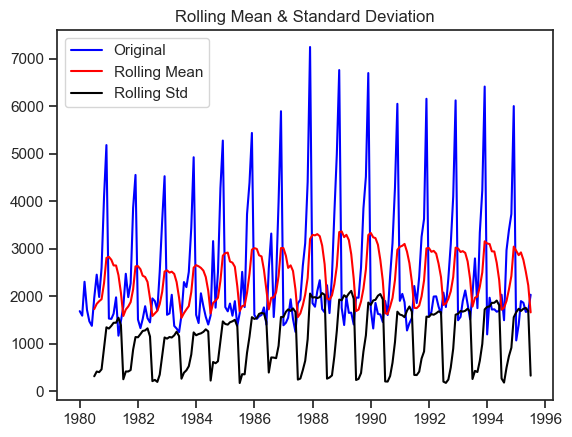

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [95]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sales'])

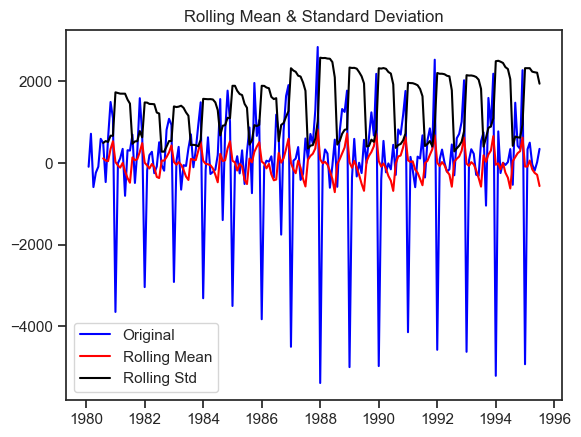

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [96]:
test_stationarity(df['Sales'].diff().dropna())

In [97]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [98]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [99]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231278064
ARIMA(0, 1, 3) - AIC:2233.9948577600953
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946736415
ARIMA(1, 1, 2) - AIC:2234.5272004521285
ARIMA(1, 1, 3) - AIC:2235.607812292888
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262364514
ARIMA(2, 1, 2) - AIC:2213.5092170036614


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.982762467654
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4989865071907


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.792548127145
ARIMA(3, 1, 3) - AIC:2221.456643202785


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [100]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509217
15  (3, 1, 3)  2221.456643
14  (3, 1, 2)  2230.792548
11  (2, 1, 3)  2232.982762
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)  2234.527200
13  (3, 1, 1)  2235.498987
7   (1, 1, 3)  2235.607812
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [101]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,2))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Thu, 11 Apr 2024   AIC                           2213.509
Time:                        21:20:00   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.786      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.731      0.000      -0.701      -0.417
ma.L1         -1.9916      0.110    -18.184      0.0

In [102]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

1299.9796919669707


In [103]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979692

In [104]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [105]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [106]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684553
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640237444
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3650.8176573058563
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388658
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873579196
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:6529.670846129748
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158620226
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920824


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3990.0122745013414
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.187105262566
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530065248
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:2858.5655791260538
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566398
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572873515
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:7223.566473551876
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838295
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193776935
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319655776529


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:1887.6123110058531
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177375
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085309694
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018823511801


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3294.9652799783707
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679616463
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727995721765
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891876694197


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:2464.108665687147
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.44101016873
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007202926
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890981025


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4437.207891034966
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332273116
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.16750773142
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605067989854


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:4726.513237989006
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774507512
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.543880062756
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215639407665


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:4049.94452999513
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993414216937
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448369278384
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883836036418


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3088.0819014357926
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.092540844109
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770691723506
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.297366135507


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:1256.1816970064015
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.030723919553
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.640407776757
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.741897671275
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:7021.889453996156
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580745992
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674815615623
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.048618663575


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2960.104104148283
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529448976269
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435178098297
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.1544859073947


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:1456.8081221416173
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339904792
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476354876


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3996.9541191297167
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279331367
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592674053
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894405483888
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:7261.962268544429
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128874
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132724407
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067648522


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3468.7227586858844
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640370525
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780412704
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.766041547116


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:2671.7086078345546
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491545695
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.355897412848
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352612323


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:12.0
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.142446802492
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7167468136386
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863725116


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:6716.816332786276
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606880619
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142234439474
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069997767789


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:259.69551331383104
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112074225852
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502516665868
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1416.7958940658789
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:2520.4048835752824
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450504134
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307505109
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291431629816
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:1326.9854773510374
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799245445
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9952183106325
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842468797466


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:6950.966932326163
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216931730193
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5152893097818
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9345627454502


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3433.5111946232355
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.809637330145
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.914697476381
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.969032364695


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3335.083425493665
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.026403977703
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381449150274
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5217767457636


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:nan
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.392159620409
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554901316387
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744592972248
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:7023.829443155462
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4154052517904
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668970562758
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.244910546552
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3279.114726070034
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723331192542
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509695545243
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649225946159


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2361.3369673306984
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.438343540748
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039829915
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3679.0456653161086
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066056989
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1757.1506607864137
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702203812765
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:7258.319946040251
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464808613
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344987073855
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191736210132


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3076.275335327513
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728033137
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.101761980729
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975700248197


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:1690.5671084375224
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145512
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0169972063807
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080339074
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:7220.382085174375
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429510602
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911249408462
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.988841128245


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:1799.613112537057
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506089775
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595846824941
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428633194435


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:4118.616315171671
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673327198925
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221282969161
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241329233788
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2836.026016355093
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681146951103
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372645685202
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523434150007
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:7148.721420176137
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931232307
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086051148618
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404027714655
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:7110.0508694638265
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.0457408202665
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476026172842
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.6893217813495
SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3588.2594725584518
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376141609985
SARIMA(2, 1, 

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:2623.612164400405
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.039588921564
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.0572484496818
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7072774496276


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:1960.9917752599792
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.8358295190062
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1710.8433040870025
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1540.5292359074074
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:20.0
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1578.0578721932648
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1569.6189967639002
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9468137221777
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:2926.82680577688
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898860862688
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1400.1291920777714
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1406.002110075297


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:2746.393738382397
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.368629141892
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923155301
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3521.602572170081
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104702983
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783849842096
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471977750294
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:7257.57014048457
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025558544
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.933081373165
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.680818810962
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3663.829913215242
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620479614
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774753990112
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3074656193921


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:2576.4888001384415
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.222098342016
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690713343805
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234050651412
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:7169.975625680686
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222519727682
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1742.3811303691161
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6844985065188


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:208.04777371196988
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505378707
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.295984988908
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498134221607


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2995.1020406218286
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883313121754
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814841084379
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.195898055854
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:2807.745190309117
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147271465286
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.7804155762424
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255004604027


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:4517.197765481487
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635866455678
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.5716080394186
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.3372506115636
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:7110.535904611206
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1564.292705265886
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894319557063
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8091500718413


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:5273.228608014201
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1399.8133176028243
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.6026118493066
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.714494245541
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2799.908179906902
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542046186
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1867.049156359547
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7829993699881
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:7063.29698886148
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1746.8742246701488
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.3009062822935
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3936094083847
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:7021.674711694981
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1567.1763997660794
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1561.9915533671747
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1548.3931207498963


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:349.86799467503033
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1473.7388522203353
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1698725058127
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.692617548643
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2778.0279828255457


In [107]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
83   (1, 1, 1)  (0, 0, 3, 12)   12.000000
183  (2, 1, 3)  (1, 0, 3, 12)   20.000000
215  (3, 1, 1)  (1, 0, 3, 12)  208.047774
91   (1, 1, 1)  (2, 0, 3, 12)  259.695513
251  (3, 1, 3)  (2, 0, 3, 12)  349.867995

In [108]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Thu, 11 Apr 2024   AIC                           1555.584
Time:                                    21:25:42   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

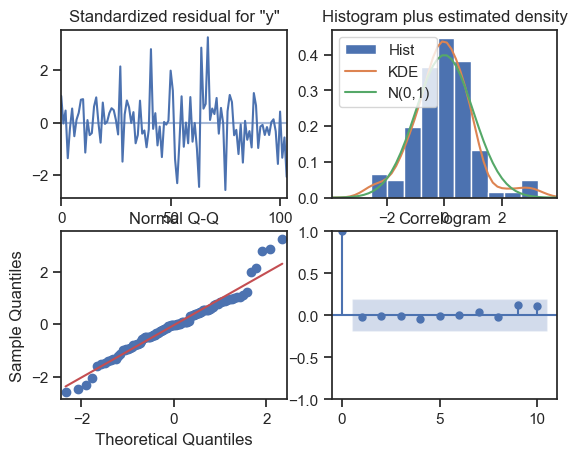

In [109]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [110]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.423280  388.343481     566.284043    2088.562516
1  1315.135052  402.005024     527.219682    2103.050421
2  1621.624915  401.998628     833.722083    2409.527747
3  1598.893456  407.235385     800.726769    2397.060143
4  1392.721059  407.965284     593.123795    2192.318324

In [111]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

528.5906080398619


In [112]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(1,1,1),(2,0,3,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979692
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.590608

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

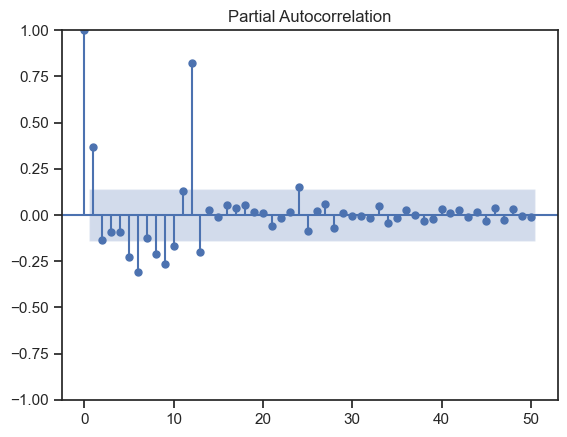

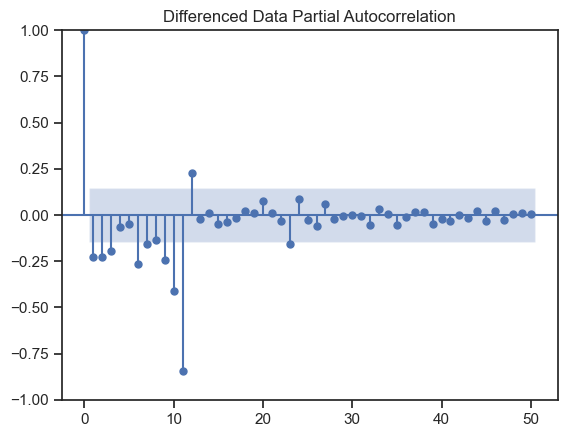

In [114]:
plot_pacf(df['Sales'],lags=50)
plot_pacf(df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

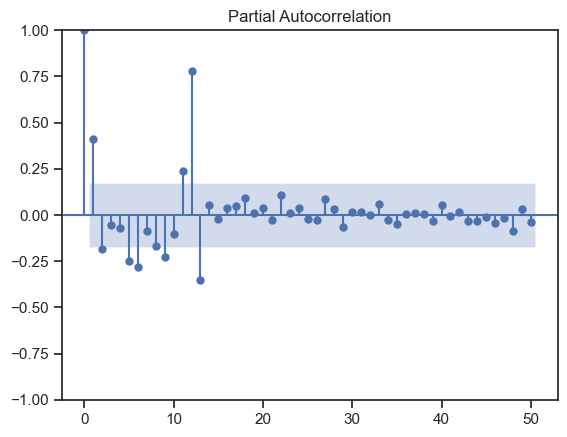

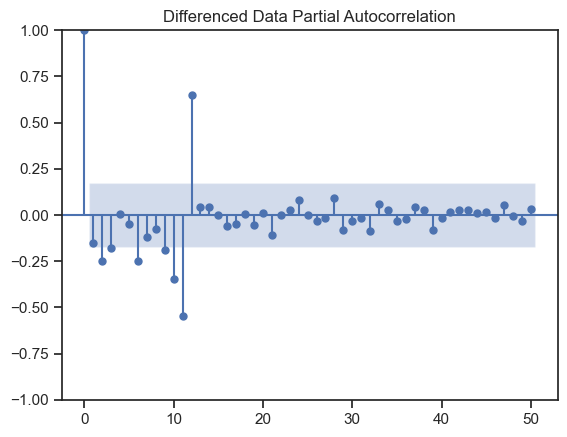

In [115]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [116]:
manual_ARIMA = ARIMA(train['Sales'], order=(1,1,1))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Thu, 11 Apr 2024   AIC                           2235.755
Time:                        21:26:55   BIC                           2244.381
Sample:                    01-01-1980   HQIC                          2239.260
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


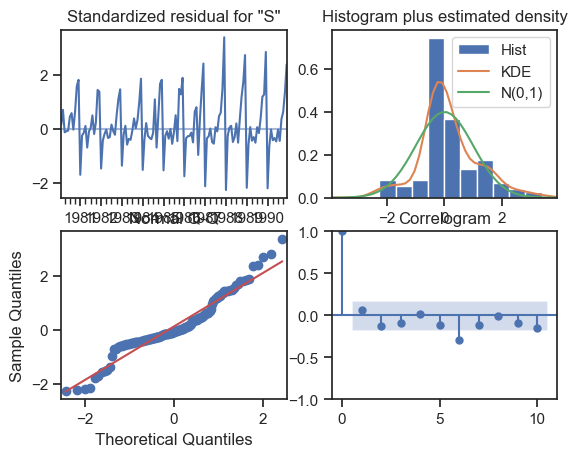

In [117]:
results_manual_ARIMA.plot_diagnostics();

In [118]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 1319.9367319145406


In [119]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979692
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.590608
ARIMA(3,1,3)                                        1319.936732

In [120]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [121]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -882.088
Date:                            Thu, 11 Apr 2024   AIC                           1774.175
Time:                                    21:26:57   BIC                           1788.071
Sample:                                         0   HQIC                          1779.818
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1957      0.104      1.878      0.060      -0.009       0.400
ma.L1         -0.9404      0.053   

In [122]:
SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0  (3, 1, 3)  (3, 0, 3, 12)  1774.175347

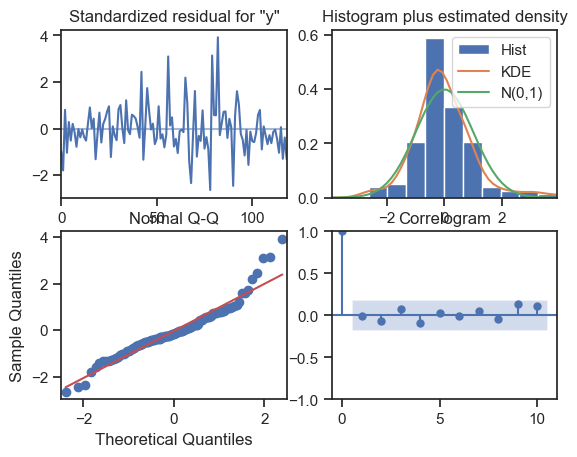

In [123]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [124]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1543.900070  388.532063     782.391219    2305.408921
1  1311.208248  400.994074     525.274305    2097.142192
2  1810.538054  403.246206    1020.190014    2600.886094
3  1650.451755  404.472611     857.700005    2443.203505
4  1561.609704  405.532750     766.780119    2356.439289

In [125]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

359.61244937595353


In [126]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(1,1,1)(1,1,1,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979692
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.590608
ARIMA(3,1,3)                                        1319.936732
(1,1,1)(1,1,1,12),Manual_SARIMA                      359.612449

In [127]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
(1,1,1)(1,1,1,12),Manual_SARIMA                      359.612449
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.590608
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average Model                                1275.081804
Linear Regression                                   1275.867052
6pointTrailingMovingAverage                         1283.927428
Auto_ARIMA                                          1299.979692
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
ARIMA(3,1,3)                                        1319.936732
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Naive Model                                         3864.279352

In [128]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [129]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [130]:
TES_train = df.copy()

In [131]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [132]:
future_predictions['Sales_Predictions']=prediction
future_predictions

Sales_Predictions
1995-08-01        1988.782193
1995-09-01        2652.762887
1995-10-01        3483.872246
1995-11-01        4354.989747
1995-12-01        6900.103171
1996-01-01        1546.800546
1996-02-01        1981.361768
1996-03-01        2245.459724
1996-04-01        2151.066942
1996-05-01        1929.355815
1996-06-01        1830.619260
1996-07-01        2272.156151

In [133]:
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1213.490105  1988.782193  2764.074282
1995-09-01  1877.470798  2652.762887  3428.054975
1995-10-01  2708.580157  3483.872246  4259.164335
1995-11-01  3579.697659  4354.989747  5130.281836
1995-12-01  6124.811083  6900.103171  7675.395260

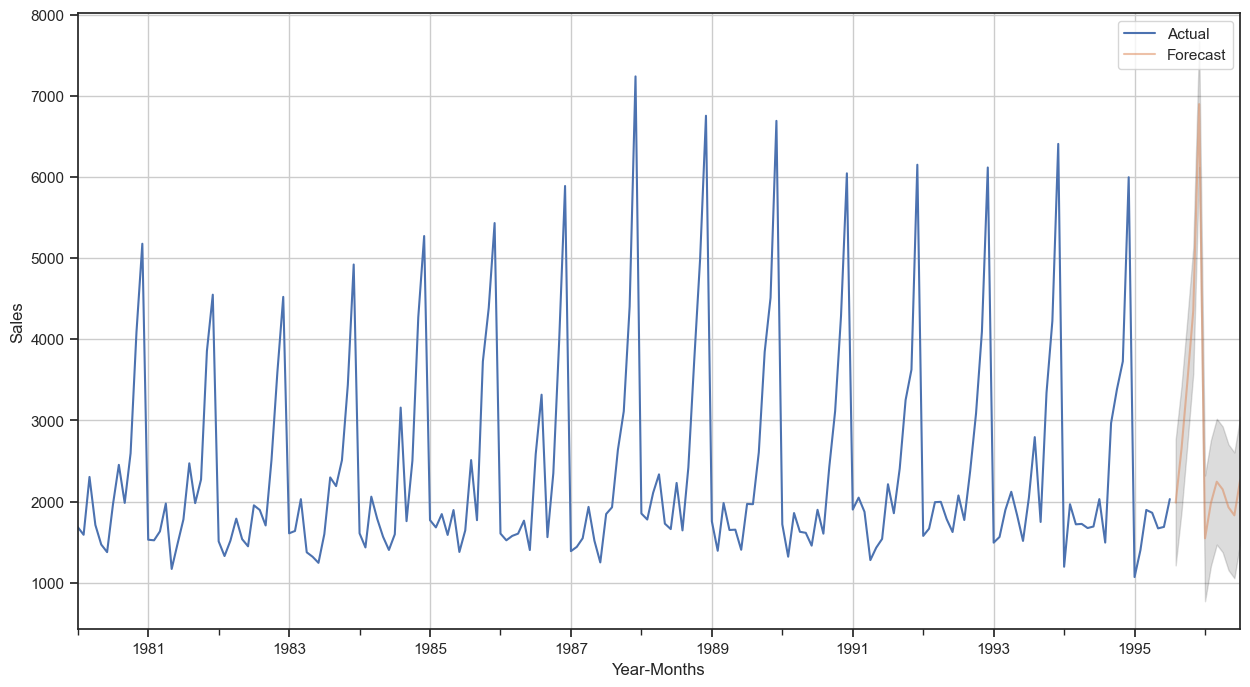

In [134]:
axis = df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

ROSE DATASET


In [135]:
df1 = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [136]:
df1.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [137]:
df1.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [138]:
df1.shape

(187, 1)

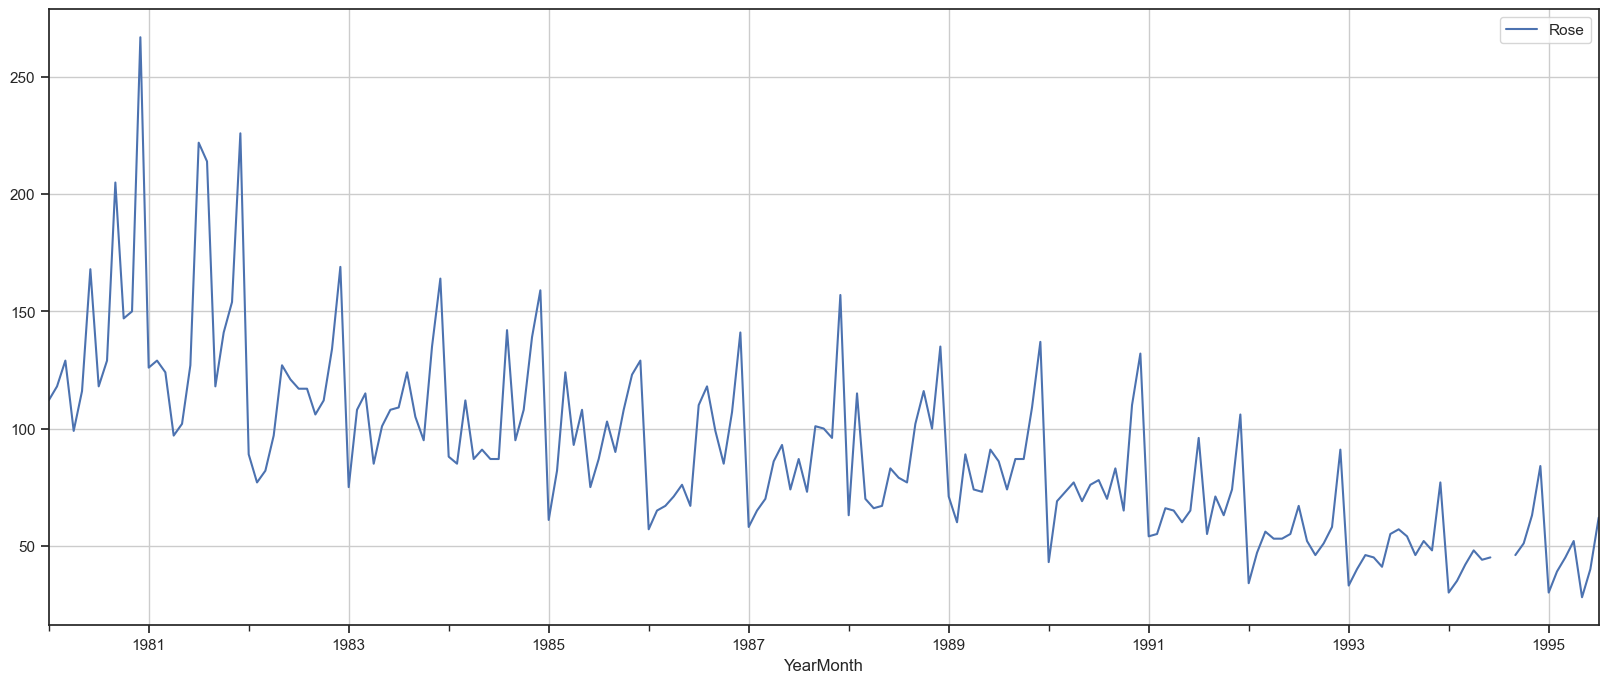

In [139]:
df1.plot(figsize=(20,8))
plt.grid();

In [140]:
df1['Year']=df1.index.year
df1['Month']=df1.index.month
df1.head()

Rose  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5

In [141]:
df1.columns=['Sales', 'Year', 'Month']
df1.head()

Sales  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5

In [142]:
df1.tail()

Sales  Year  Month
YearMonth                     
1995-03-01   45.0  1995      3
1995-04-01   52.0  1995      4
1995-05-01   28.0  1995      5
1995-06-01   40.0  1995      6
1995-07-01   62.0  1995      7

In [143]:
df1.shape

(187, 3)

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   185 non-null    float64
 1   Year    187 non-null    int32  
 2   Month   187 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 4.4 KB


In [145]:
round(df1.describe().T)

count    mean   std     min     25%     50%     75%     max
Sales  185.0    90.0  39.0    28.0    63.0    86.0   112.0   267.0
Year   187.0  1987.0   5.0  1980.0  1983.0  1987.0  1991.0  1995.0
Month  187.0     6.0   3.0     1.0     3.0     6.0     9.0    12.0

In [146]:
df1.isnull().sum()

Sales    2
Year     0
Month    0
dtype: int64

In [147]:
df1[df1['Sales'].isna()]

Sales  Year  Month
YearMonth                     
1994-07-01    NaN  1994      7
1994-08-01    NaN  1994      8

In [148]:
df1['Sales_Before_After_Mean']=df1['Sales']

In [149]:
np.mean(df1[df1.Month==7]['1993-07-01':'1995-07-01']['Sales'])

59.5

In [150]:
df1.loc['1994-07-01', 'Sales_Before_After_Mean']=np.mean(
    df1[df1.Month==7]['1993-07-01':'1995-07-01']['Sales'])
df1.loc['1994-08-01', 'Sales_Before_After_Mean']=np.mean(
    df1[df1.Month==8]['1993-08-01':'1995-08-01']['Sales'])

df1[df1['Sales_Before_After_Mean'].isna()]

Empty DataFrame
Columns: [Sales, Year, Month, Sales_Before_After_Mean]
Index: []

In [151]:
df1.loc['1994-07-01':'1994-08-01']

Sales  Year  Month  Sales_Before_After_Mean
YearMonth                                              
1994-07-01    NaN  1994      7                     59.5
1994-08-01    NaN  1994      8                     54.0

In [152]:
df1[df1.Month==7]

Sales  Year  Month  Sales_Before_After_Mean
YearMonth                                              
1980-07-01  118.0  1980      7                    118.0
1981-07-01  222.0  1981      7                    222.0
1982-07-01  117.0  1982      7                    117.0
1983-07-01  109.0  1983      7                    109.0
1984-07-01   87.0  1984      7                     87.0
1985-07-01   87.0  1985      7                     87.0
1986-07-01  110.0  1986      7                    110.0
1987-07-01   87.0  1987      7                     87.0
1988-07-01   79.0  1988      7                     79.0
1989-07-01   86.0  1989      7                     86.0
1990-07-01   78.0  1990      7                     78.0
1991-07-01   96.0  1991      7                     96.0
1992-07-01   67.0  1992      7                     67.0
1993-07-01   57.0  1993      7                     57.0
1994-07-01    NaN  1994      7                     59.5
1995-07-01   62.0  1995      7                     62.0

In [153]:
df1[df1.Month==8]

Sales  Year  Month  Sales_Before_After_Mean
YearMonth                                              
1980-08-01  129.0  1980      8                    129.0
1981-08-01  214.0  1981      8                    214.0
1982-08-01  117.0  1982      8                    117.0
1983-08-01  124.0  1983      8                    124.0
1984-08-01  142.0  1984      8                    142.0
1985-08-01  103.0  1985      8                    103.0
1986-08-01  118.0  1986      8                    118.0
1987-08-01   73.0  1987      8                     73.0
1988-08-01   77.0  1988      8                     77.0
1989-08-01   74.0  1989      8                     74.0
1990-08-01   70.0  1990      8                     70.0
1991-08-01   55.0  1991      8                     55.0
1992-08-01   52.0  1992      8                     52.0
1993-08-01   54.0  1993      8                     54.0
1994-08-01    NaN  1994      8                     54.0

In [154]:
df1.drop(['Sales'],inplace=True,axis=1)

df1.head()

Year  Month  Sales_Before_After_Mean
YearMonth                                       
1980-01-01  1980      1                    112.0
1980-02-01  1980      2                    118.0
1980-03-01  1980      3                    129.0
1980-04-01  1980      4                     99.0
1980-05-01  1980      5                    116.0

In [155]:
df1.columns=['Year', 'Month', 'Sales']
df1.isnull().sum()

Year     0
Month    0
Sales    0
dtype: int64

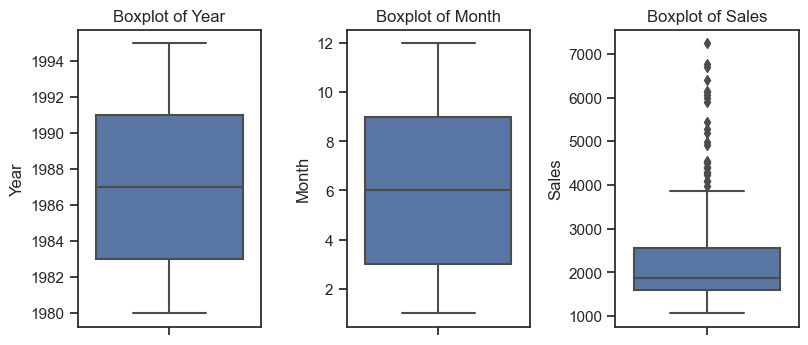

In [156]:
dfbox1=df1
plt.figure(figsize = (19,10))
feature_list = dfbox1.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<Axes: xlabel='YearMonth'>

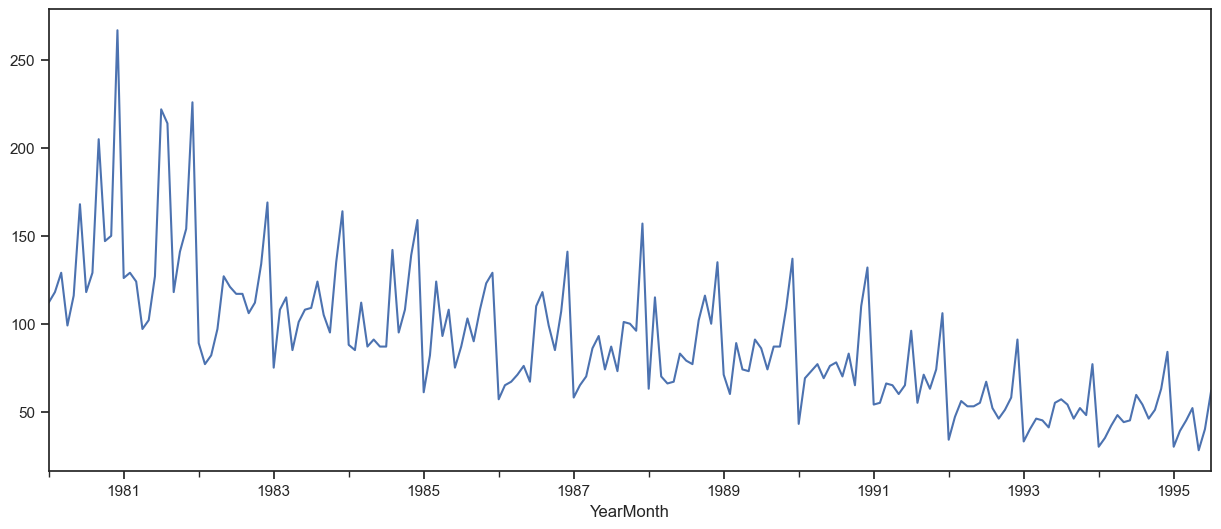

In [157]:
plt.figure(figsize=(15,6))
df1['Sales'].plot()

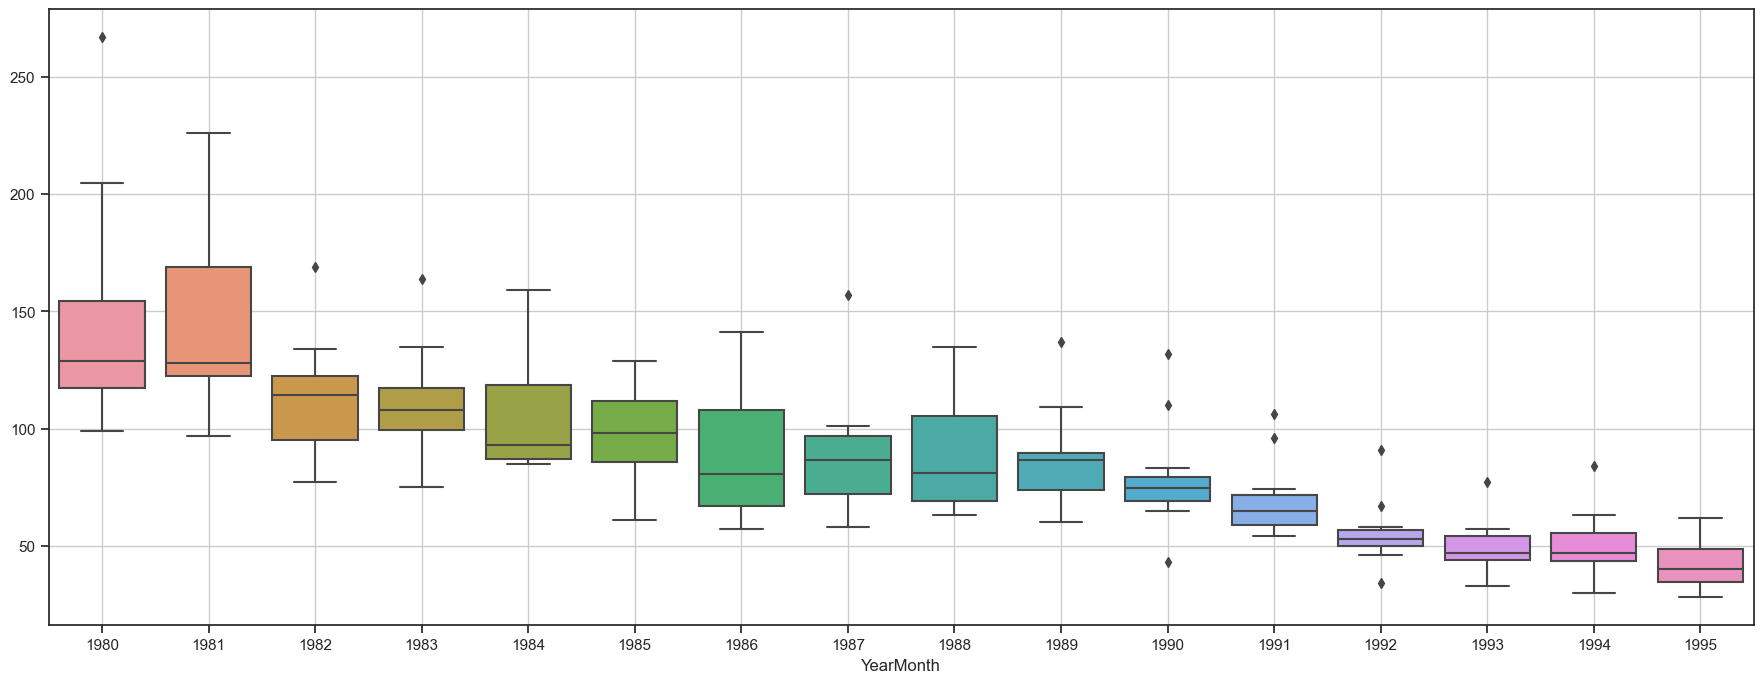

In [158]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.year,y = df1.values[:,2],ax=ax)
plt.grid();

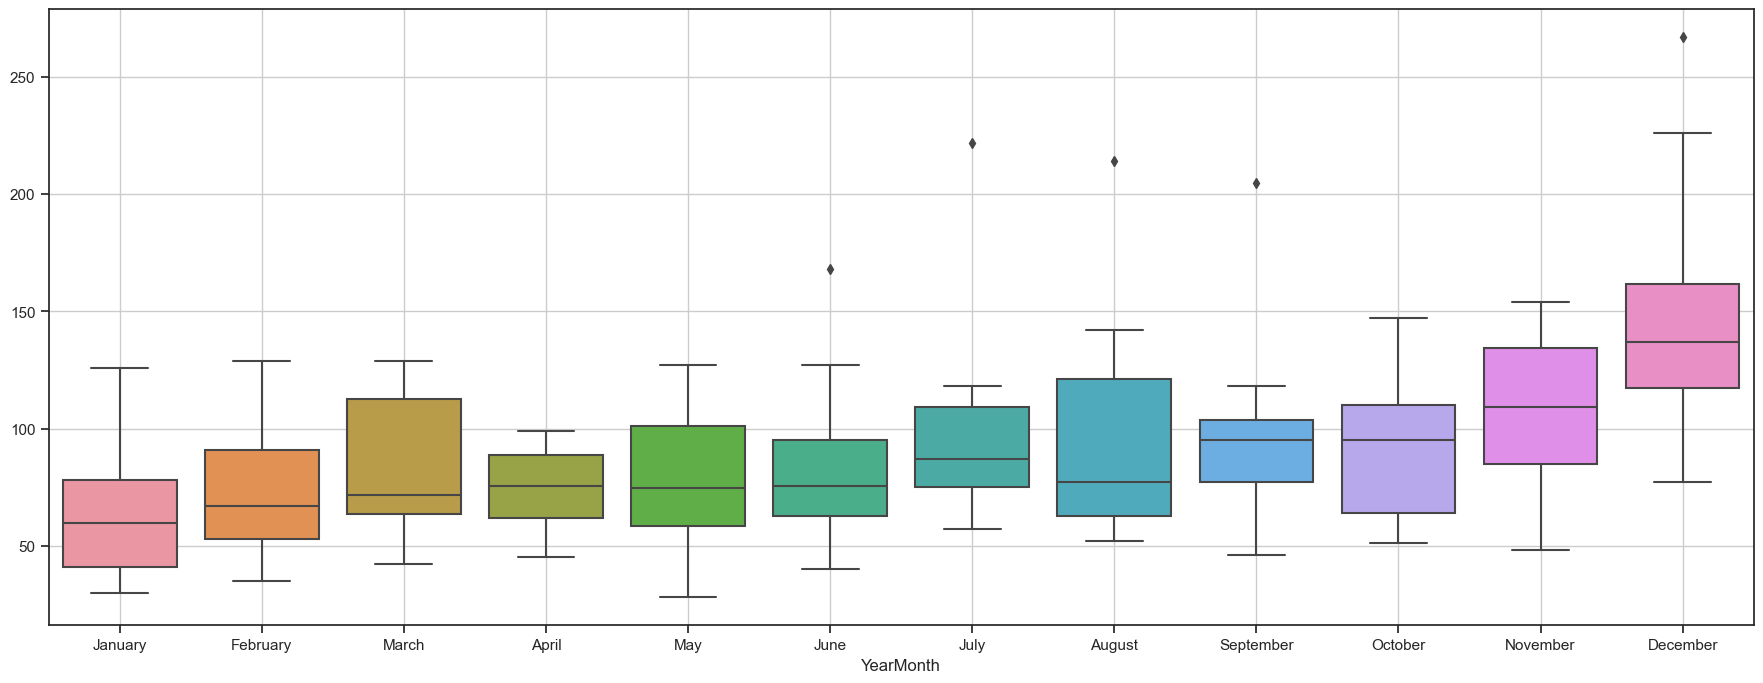

In [159]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.month_name(),y = df1.values[:,2],ax=ax)
plt.grid();

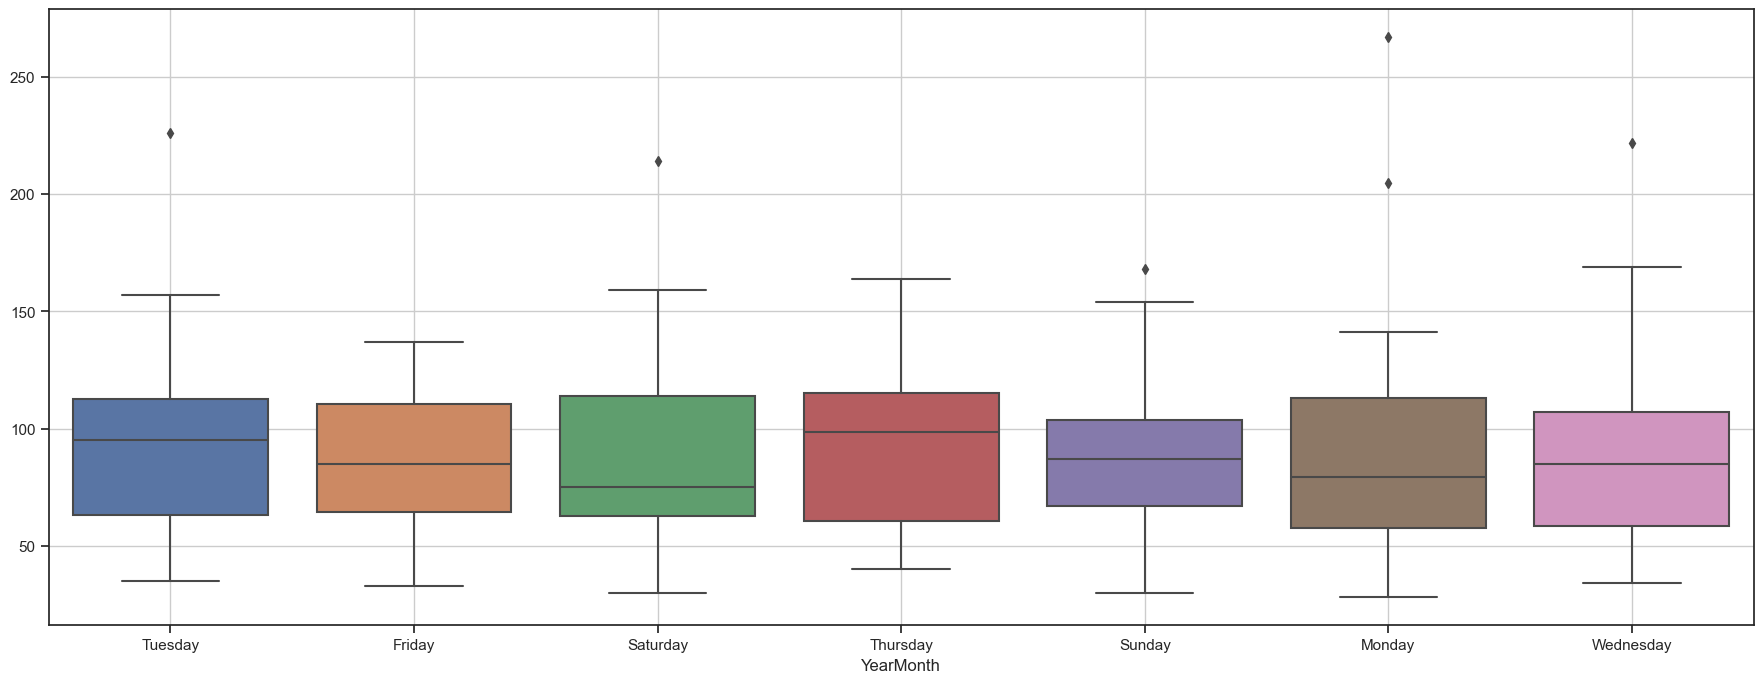

In [160]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.day_name(),y = df1.values[:,2],ax=ax)
plt.grid();

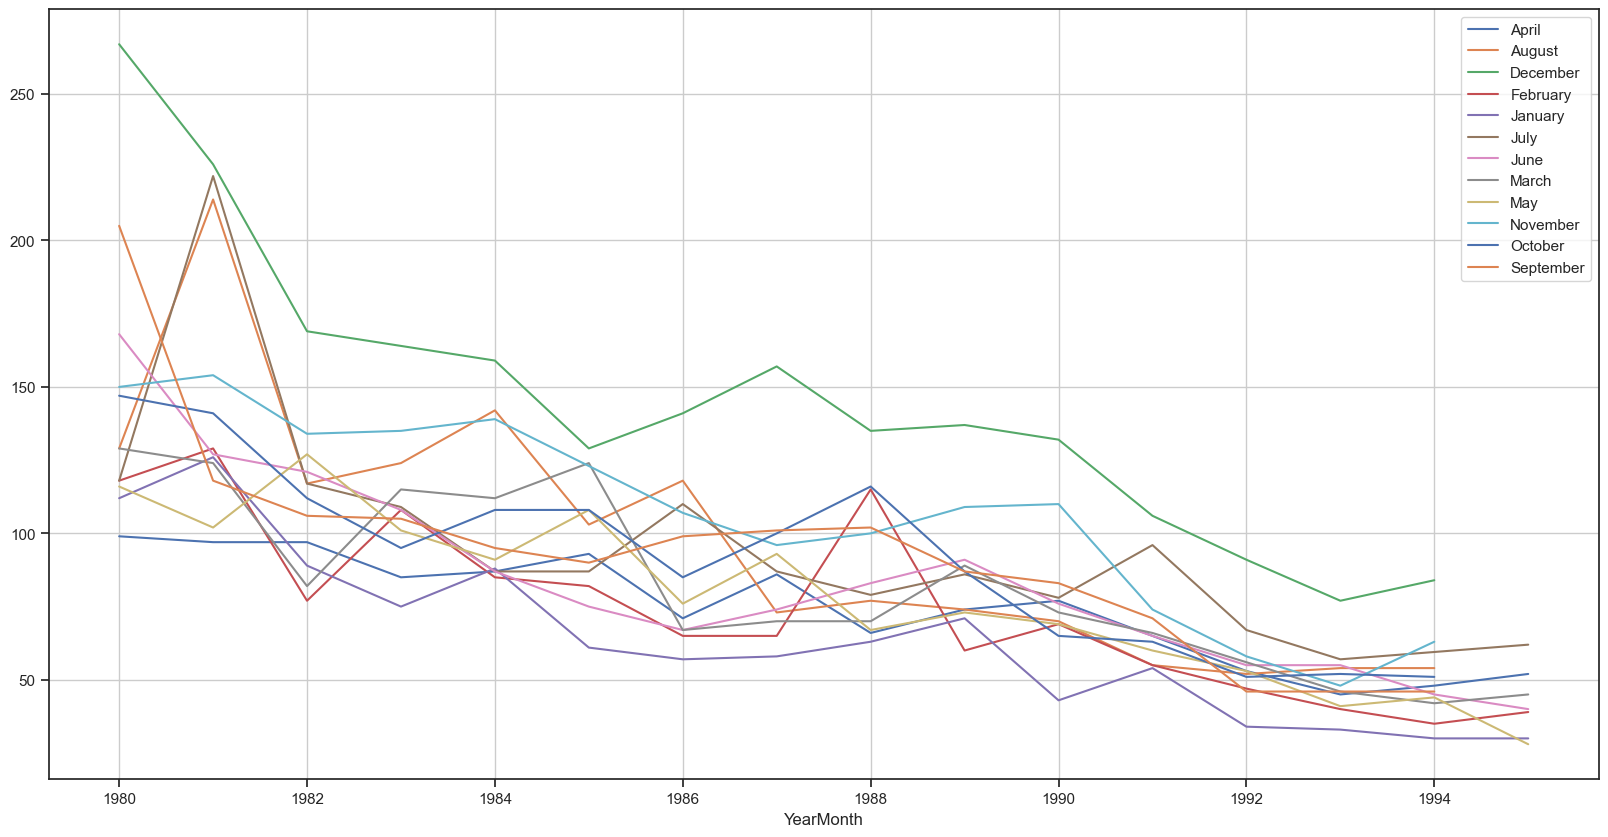

In [161]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Sales', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

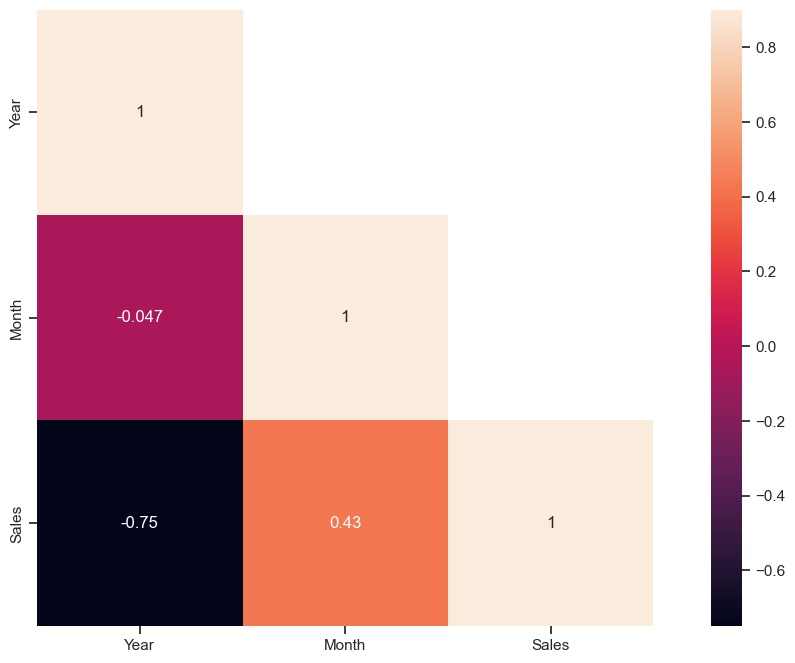

In [162]:
corr_all = df1.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

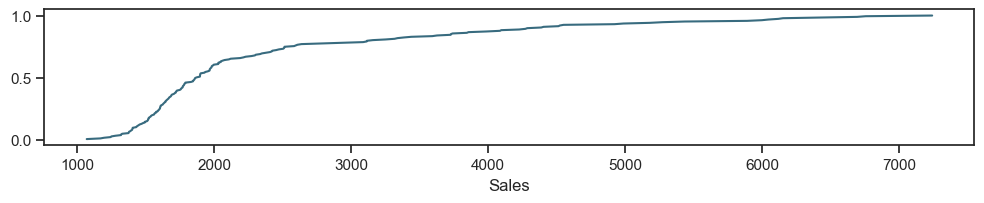

In [163]:
from statsmodels.distributions.empirical_distribution import ECDF
sns.set(style = "ticks")
c = '#386B7F' 
plt.figure(figsize = (12, 6)) 
plt.subplot(312)
cdf = ECDF(df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

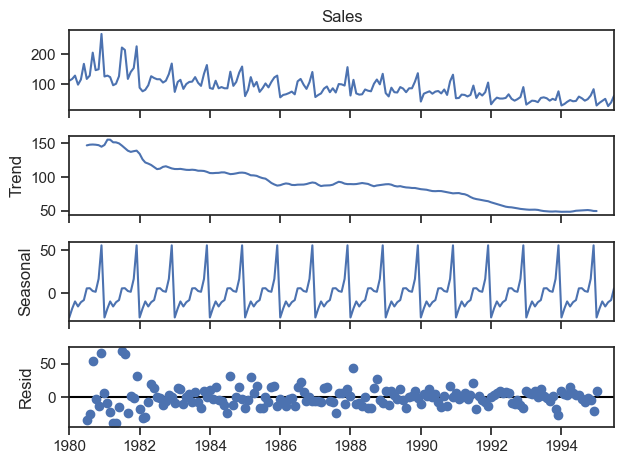

In [164]:
decomposition = seasonal_decompose(df1['Sales'],model='additive')
decomposition.plot();

In [165]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.031994
1980-02-01   -17.543105
1980-03-01    -9.418105
1980-04-01   -15.230605
1980-05-01   -10.328819
1980-06-01    -7.810962
1980-07-01     5.718006
1980-08-01     5.931895
1980-09-01     2.651339
1980-10-01     1.748562
1980-11-01    16.723562
1980-12-01    55.590228
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.801339
1980-08-01   -25.056895
1980-09-01    53.973661
1980-10-01    -2.831895
1980-11-01   -14.140228
1980-12-01    66.28477

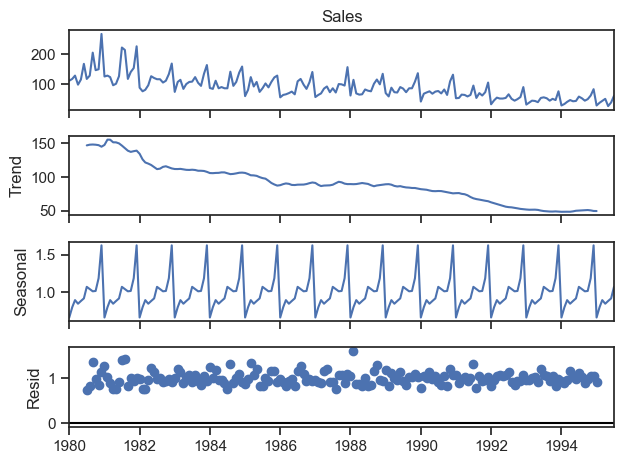

In [166]:
decomposition = seasonal_decompose(df1['Sales'],model='multiplicative')
decomposition.plot();

In [167]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.668577
1980-02-01    0.804550
1980-03-01    0.898744
1980-04-01    0.851237
1980-05-01    0.886934
1980-06-01    0.921546
1980-07-01    1.074644
1980-08-01    1.044683
1980-09-01    1.015406
1980-10-01    1.020108
1980-11-01    1.189232
1980-12-01    1.624338
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.746542
1980-08-01    0.833636
1980-09-01    1.360672
1980-10-01    0.973117
1980-11-01    0.855614
1980-12-01    1.132642
Name: resid, dtype: fl

In [168]:
train = df1[df1.index < '1991-01-01']
test = df1[df1.index >= '1991-01-01']

In [169]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0 

Last few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1990-08-01  1990      8   70.0
1990-09-01  1990      9   83.0
1990-10-01  1990     10   65.0
1990-11-01  1990     11  110.0
1990-12-01  1990     12  132.0 

First few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1991-01-01  1991      1   54.0
1991-02-01  1991      2   55.0
1991-03-01  1991      3   66.0
1991-04-01  1991      4   65.0
1991-05-01  1991      5   60.0 

Last few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1995-03-01  1995      3   45.0
1995-04-01  1995      4   52.0
1995-0

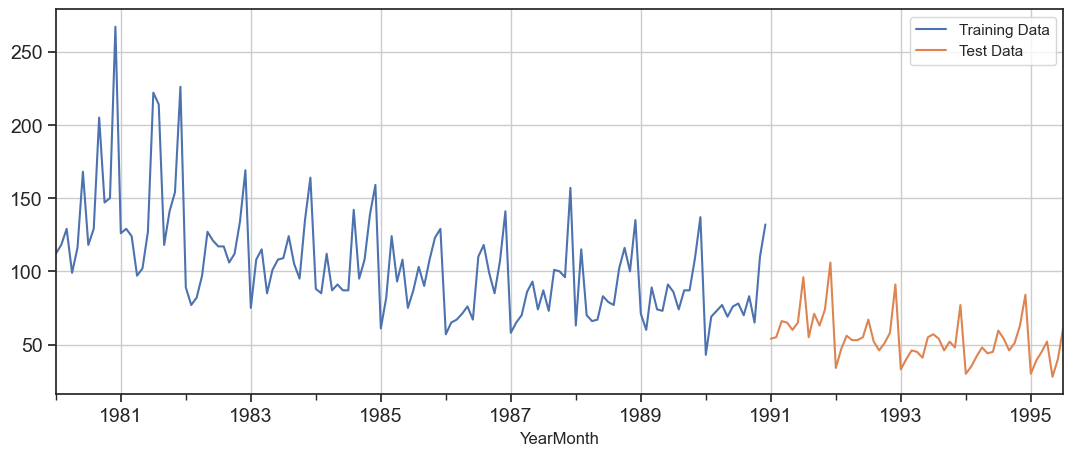

In [170]:
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [171]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [172]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [173]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

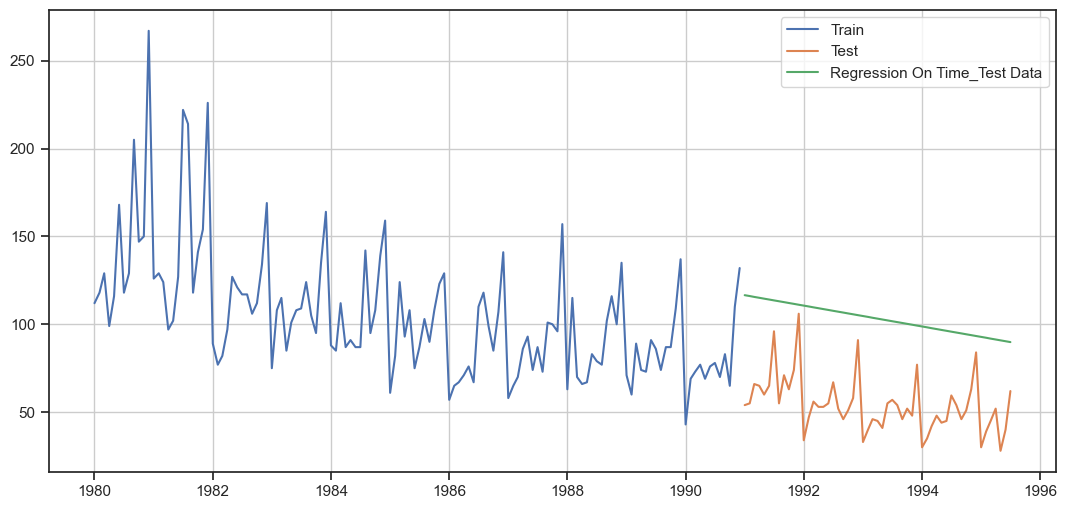

In [174]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [175]:
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  51.080941

In [176]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [177]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

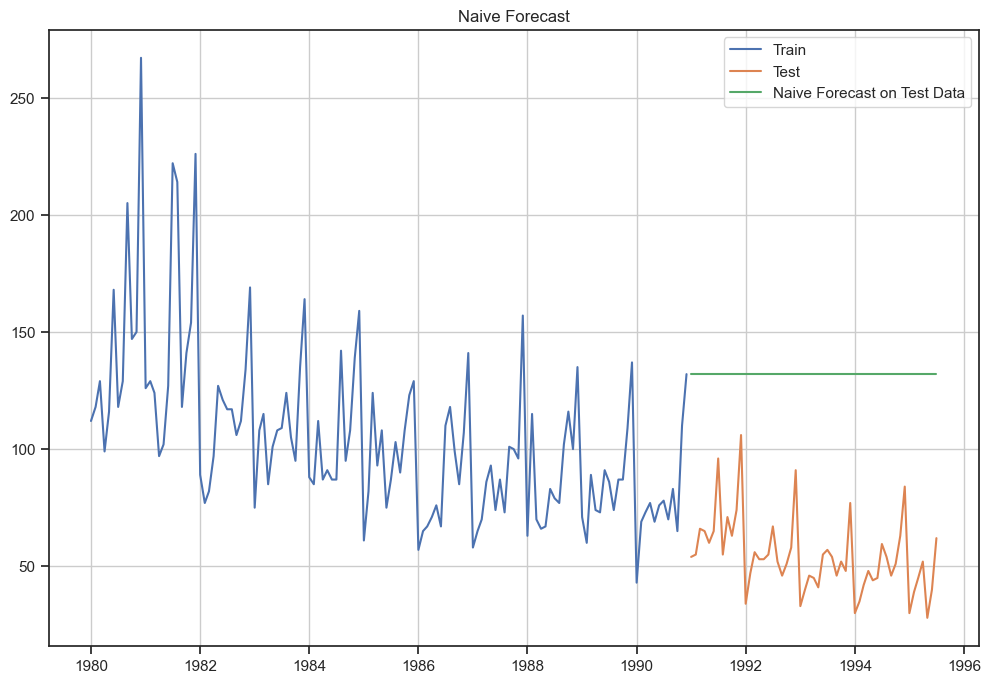

In [178]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [179]:
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  51.080941
Naive Model        79.304391

In [180]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [181]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Year  Month  Sales  mean_forecast
YearMonth                                    
1991-01-01  1991      1   54.0     104.939394
1991-02-01  1991      2   55.0     104.939394
1991-03-01  1991      3   66.0     104.939394
1991-04-01  1991      4   65.0     104.939394
1991-05-01  1991      5   60.0     104.939394

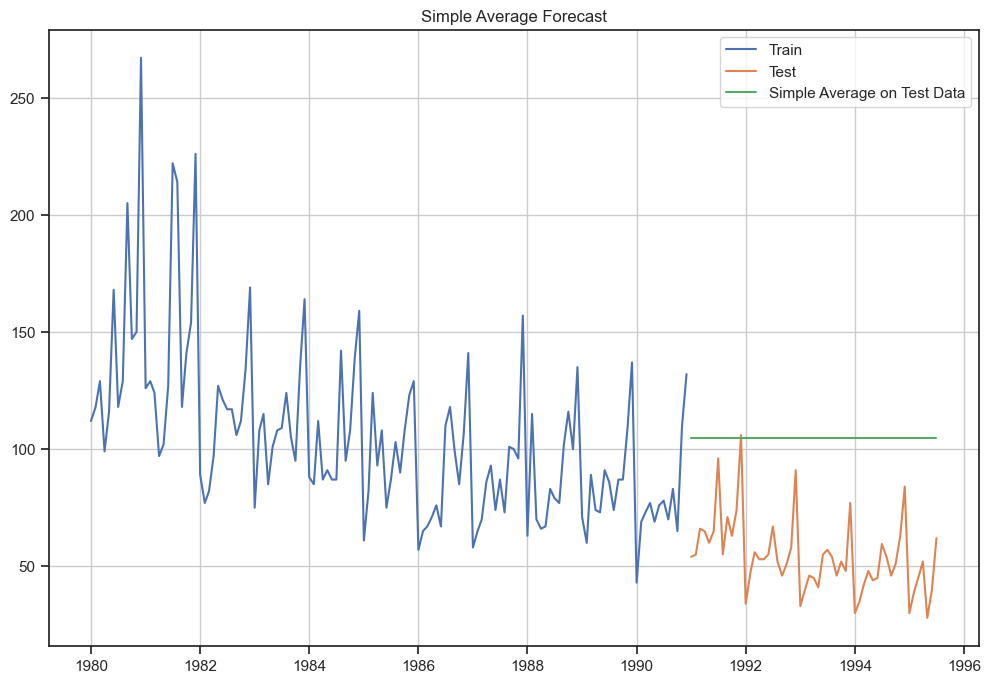

In [182]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [183]:
rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression     51.080941
Naive Model           79.304391
Simple Average Model  53.049755

In [184]:
MovingAverage = df1.copy()
MovingAverage.head()

Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0

In [185]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()
MovingAverage.head()

Year  Month  Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01-01  1980      1  112.0         NaN         NaN         NaN         NaN
1980-02-01  1980      2  118.0       115.0         NaN         NaN         NaN
1980-03-01  1980      3  129.0       123.5         NaN         NaN         NaN
1980-04-01  1980      4   99.0       114.0       114.5         NaN         NaN
1980-05-01  1980      5  116.0       107.5       115.5         NaN         NaN

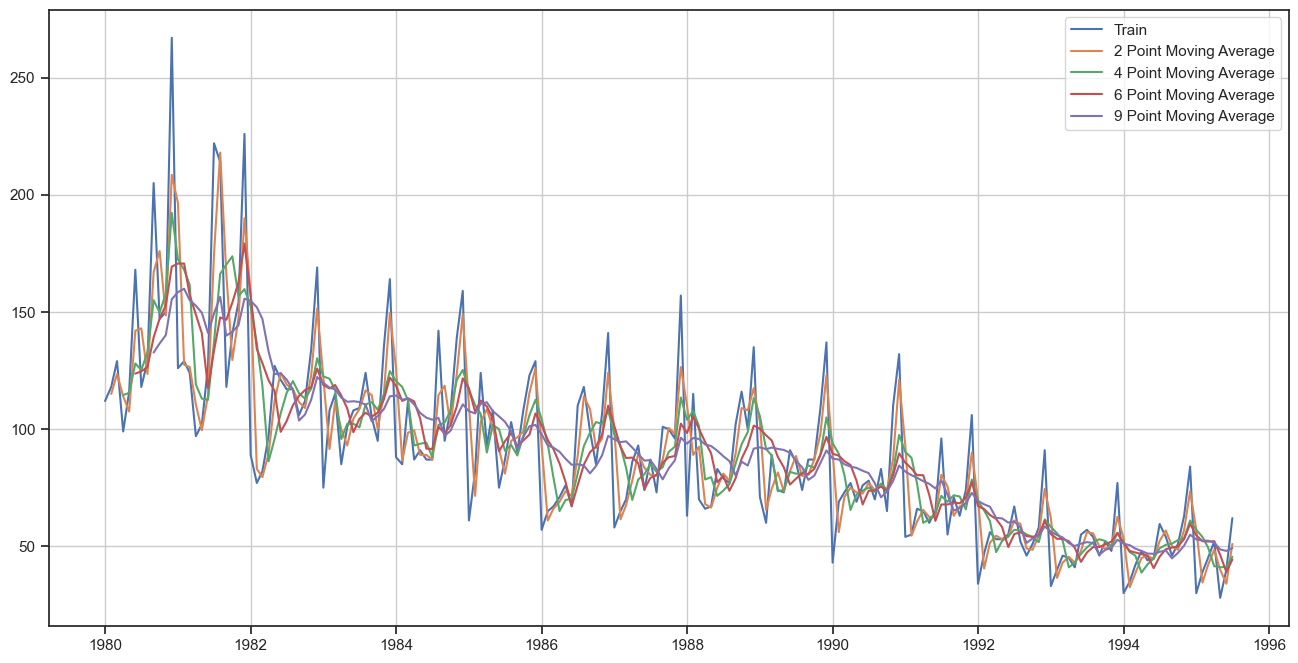

In [186]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [187]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


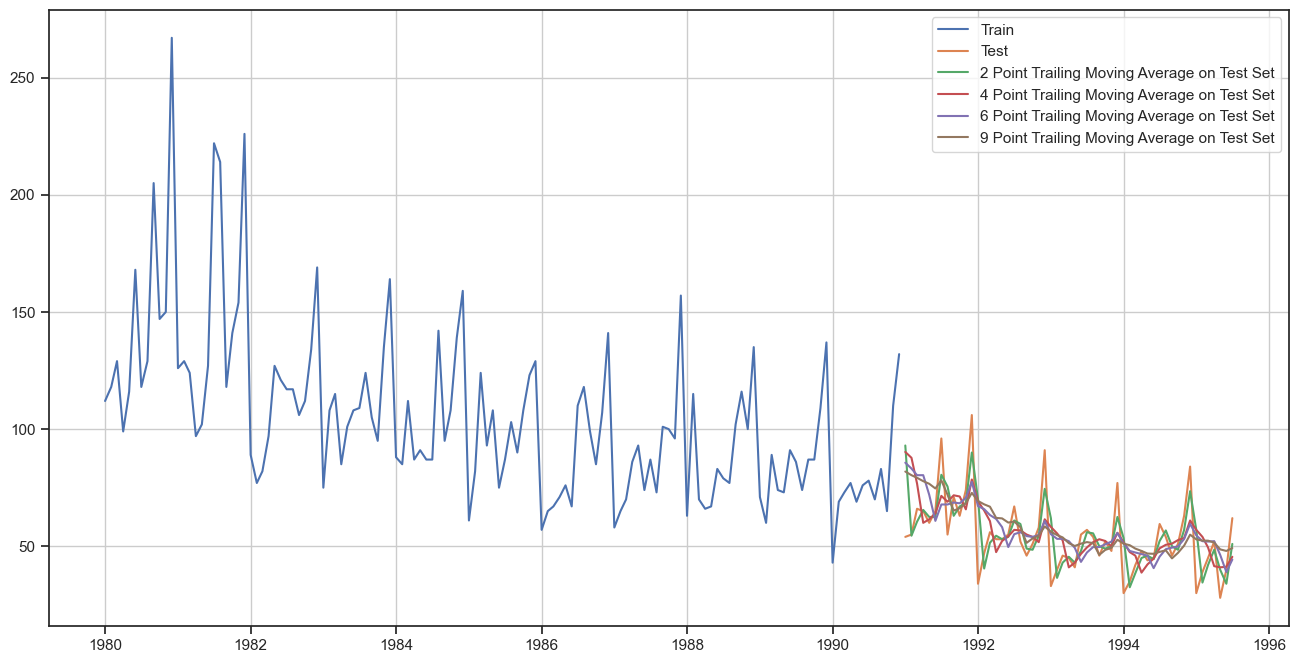

In [188]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [189]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [190]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            51.080941
Naive Model                  79.304391
Simple Average Model         53.049755
2pointTrailingMovingAverage  11.589082
4pointTrailingMovingAverage  14.506190
6pointTrailingMovingAverage  14.558008
9pointTrailingMovingAverage  14.797139

In [191]:
SES_train = train.copy()
SES_test = test.copy()

In [192]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [193]:
model_SES_autofit = model_SES.fit(optimized=True)

In [194]:
model_SES_autofit.params

{'smoothing_level': 0.12362013660706869,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [195]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [196]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Year  Month  Sales    predict
YearMonth                                
1991-01-01  1991      1   54.0  87.983766
1991-02-01  1991      2   55.0  87.983766
1991-03-01  1991      3   66.0  87.983766
1991-04-01  1991      4   65.0  87.983766
1991-05-01  1991      5   60.0  87.983766

In [197]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp._append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

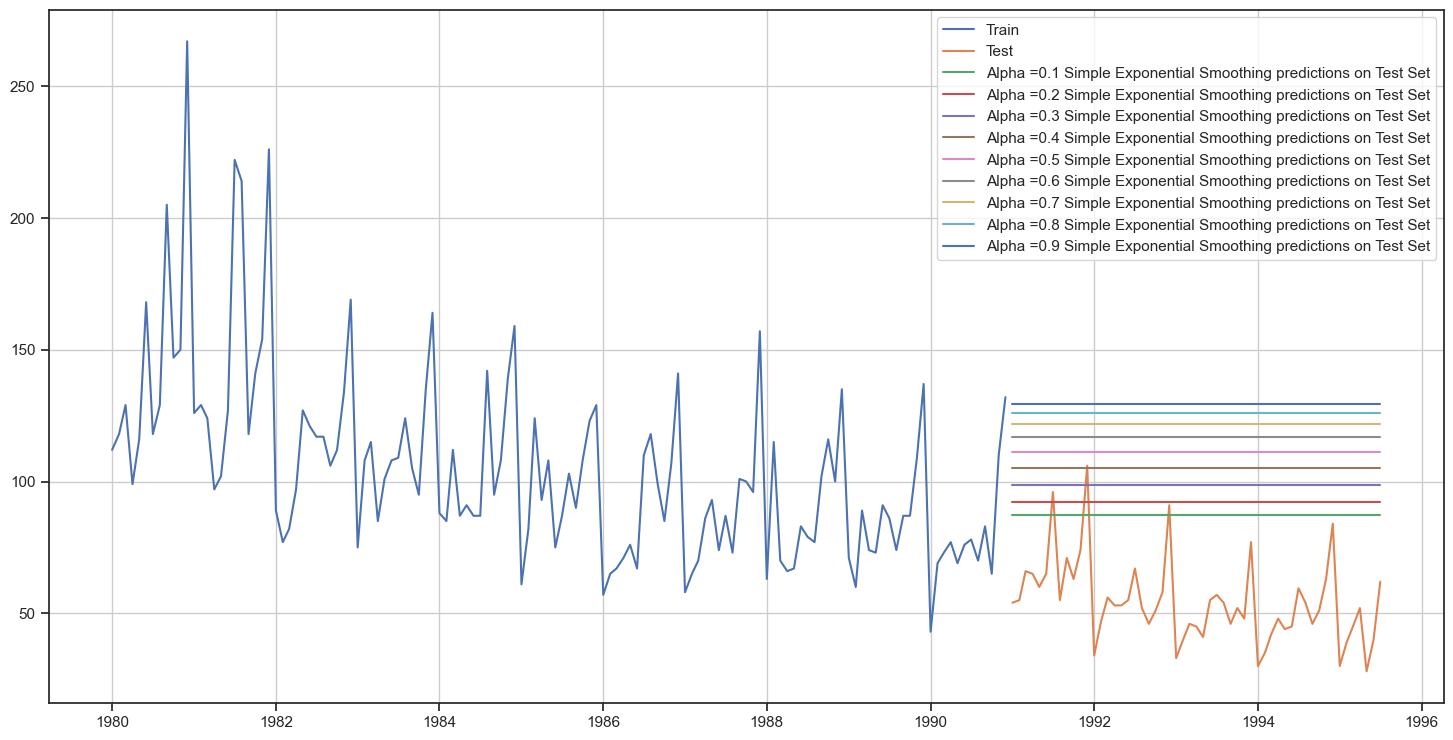

In [198]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [199]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.429535
1           0.2   31.979391  40.957988
2           0.3   32.470164  47.096522
3           0.4   33.035130  53.356493
4           0.5   33.682839  59.229384
5           0.6   34.441171  64.558022
6           0.7   35.323261  69.284383
7           0.8   36.334596  73.359904
8           0.9   37.482782  76.725002

In [200]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                     51.080941
Naive Model                           79.304391
Simple Average Model                  53.049755
2pointTrailingMovingAverage           11.589082
4pointTrailingMovingAverage           14.506190
6pointTrailingMovingAverage           14.558008
9pointTrailingMovingAverage           14.797139
Alpha=0.1,SimpleExponentialSmoothing  36.429535

In [201]:
DES_train = train.copy()
DES_test = test.copy()

In [202]:
model_DES = Holt(DES_train['Sales'])

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [203]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.16213319620268435,
 'smoothing_trend': 0.13152157897780353,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [204]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Year  Month  Sales    predict
YearMonth                                
1991-01-01  1991      1   54.0  87.249992
1991-02-01  1991      2   55.0  88.152721
1991-03-01  1991      3   66.0  89.055450
1991-04-01  1991      4   65.0  89.958179
1991-05-01  1991      5   60.0  90.860909

In [205]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [206]:
rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 37.193


In [207]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6._append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDf_6

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   36.510010
1            0.1          0.2   33.450729   48.221436
2            0.1          0.3   33.145789   77.649847
3            0.1          0.4   33.262191   99.064536
4            0.1          0.5   33.688415  123.742433
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  801.137173
96           1.0          0.7   54.497039  841.349112
97           1.0          0.8   57.365879  853.421959
98           1.0          0.9   60.474309  834.167545
99           1.0          1.0   63.873454  779.536777

[100 rows x 4 columns]

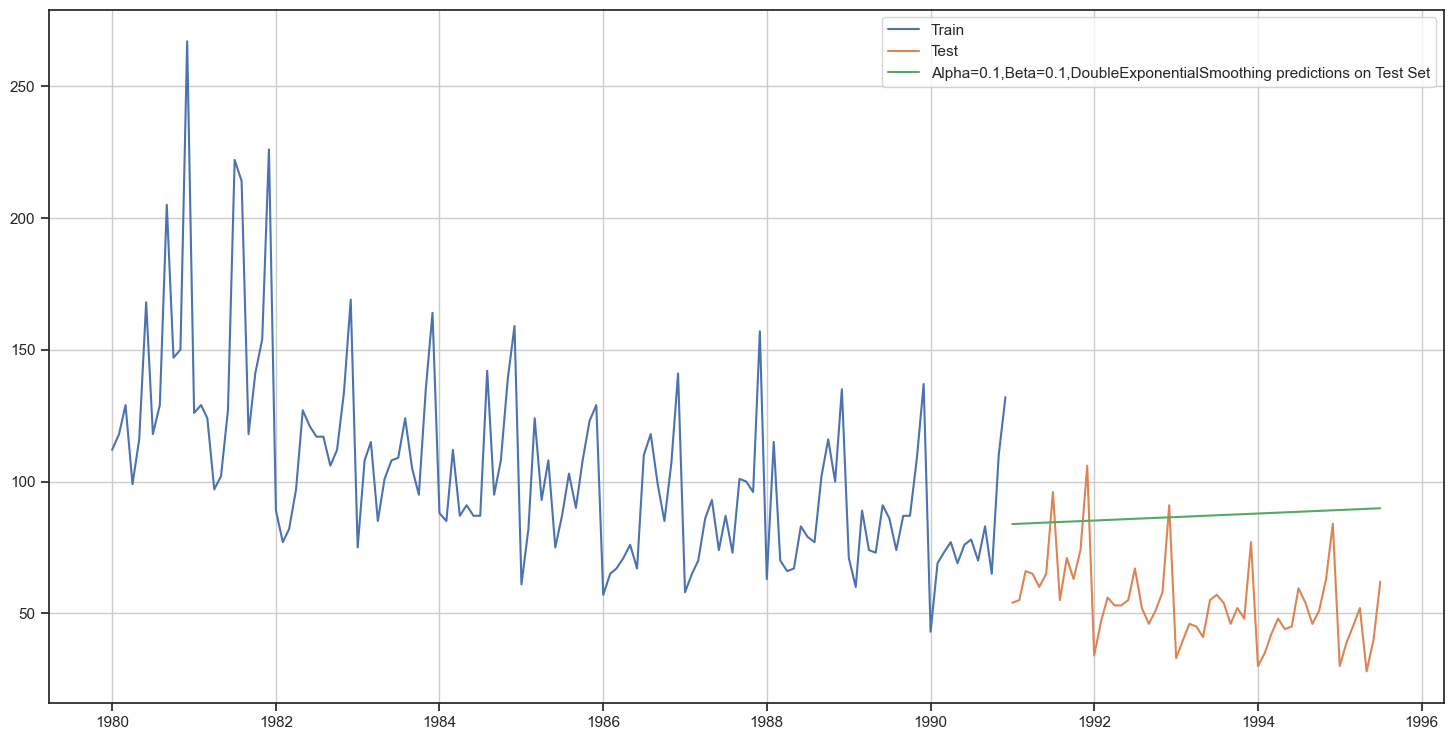

In [208]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [209]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  36.510010
1            0.1          0.2   33.450729  48.221436
10           0.2          0.1   33.097427  65.251675
2            0.1          0.3   33.145789  77.649847
20           0.3          0.1   33.611269  98.152852

In [210]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010

In [211]:
TES_train = train.copy()
TES_test = test.copy()

In [212]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [213]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [214]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [215]:
resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [216]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.08830330642635406,
 'smoothing_trend': 6.730635331927582e-05,
 'smoothing_seasonal': 0.004455138229351625,
 'damping_trend': nan,
 'initial_level': 146.88752868155674,
 'initial_trend': -0.5492163940406024,
 'initial_seasons': array([-31.12207537, -18.81171138, -10.86052241, -21.52235816,
        -12.68359535,  -7.17529564,   2.7456236 ,   8.84900094,
          4.85724354,   2.9520333 ,  21.05004912,  63.29916317]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [217]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.07132109562890512,
 'smoothing_trend': 0.04553831096563722,
 'smoothing_seasonal': 8.356711212063695e-07,
 'damping_trend': nan,
 'initial_level': 134.25655591779326,
 'initial_trend': -0.8038265942903572,
 'initial_seasons': array([0.83746068, 0.94985307, 1.03812083, 0.90732186, 1.02043162,
        1.11131741, 1.22228039, 1.30104211, 1.23132915, 1.20610008,
        1.40577823, 1.93832412]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [218]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.0521696988178152,
 'smoothing_trend': 0.03546119906270268,
 'smoothing_seasonal': 0.00028476357235519487,
 'damping_trend': nan,
 'initial_level': 165.34400052966296,
 'initial_trend': 0.9923066985722868,
 'initial_seasons': array([0.68749747, 0.77992196, 0.85424762, 0.74551695, 0.83903295,
        0.91333126, 1.00288146, 1.06901269, 1.01412988, 0.99063168,
        1.15690782, 1.59275092]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [219]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.04392379552557389,
 'smoothing_trend': 2.2382727020656378e-05,
 'smoothing_seasonal': 0.0005301252122432588,
 'damping_trend': nan,
 'initial_level': 141.25278376466085,
 'initial_trend': 0.993889634188071,
 'initial_seasons': array([-22.44377304, -10.02696656,  -1.98981311, -12.58528373,
         -3.74636822,   1.74412094,  11.67398645,  17.78894186,
         13.81217532,  11.92521254,  30.01867872,  72.29048742]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [220]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa
YearMonth                                    
1991-01-01  1991      1   54.0      42.672382
1991-02-01  1991      2   55.0      54.439917
1991-03-01  1991      3   66.0      61.841877
1991-04-01  1991      4   65.0      50.636896
1991-05-01  1991      5   60.0      58.918913

In [221]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01  1991      1   54.0      42.672382      56.334597
1991-02-01  1991      2   55.0      54.439917      63.692059
1991-03-01  1991      3   66.0      61.841877      69.388935
1991-04-01  1991      4   65.0      50.636896      60.452304
1991-05-01  1991      5   60.0      58.918913      67.770362

In [222]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01  1991      1   54.0      42.672382      56.334597      55.894208
1991-02-01  1991      2   55.0      54.439917      63.692059      63.236692
1991-03-01  1991      3   66.0      61.841877      69.388935      69.062862
1991-04-01  1991      4   65.0      50.636896      60.452304      60.106162
1991-05-01  1991      5   60.0      58.918913      67.770362      67.444092

In [223]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01  1991      1   54.0      42.672382      56.334597      55.894208   
1991-02-01  1991      2   55.0      54.439917      63.692059      63.236692   
1991-03-01  1991      3   66.0      61.841877      69.388935      69.062862   
1991-04-01  1991      4   65.0      50.636896      60.452304      60.106162   
1991-05-01  1991      5   60.0      58.918913      67.770362      67.444092   

            predict_tm_sa  
YearMonth                  
1991-01-01      43.085644  
1991-02-01      55.102106  
1991-03-01      62.741356  
1991-04-01      51.750473  
1991-05-01      60.196334

In [224]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 14.149
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 19.753
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 20.307
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 16.354


In [225]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192624

In [226]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2
resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [227]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)

In [228]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)

In [229]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [230]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [231]:
TES_test.head()

Year  Month  Sales  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                        
1991-01-01  1991      1   54.0                       45.711834   
1991-02-01  1991      2   55.0                       56.369270   
1991-03-01  1991      3   66.0                       63.004762   
1991-04-01  1991      4   65.0                       51.663022   
1991-05-01  1991      5   60.0                       58.931424   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                       46.537302   
1991-02-01                       60.659980   
1991-03-01                       65.794341   
1991-04-01                       58.369250   
1991-05-01                       61.246579   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                       46.559436   
1991-02-01                                       62.645947   
1991-03-01                                       66.979401   
1991-04-01                                       62.190538   
1991-05-01                                       62.077338   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                       46.071952                       45.225493   
1991-02-01                       63.356292                       63.447907   
1991-03-01                       67.649481                       68.330584   
1991-04-01                       64.397061                       65.989684   
1991-05-01                       62.127541                       62.025325   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                       44.012323   
1991-02-01                       63.255359   
1991-03-01                       69.025477   
1991-04-01                       67.481555   
1991-05-01                       62.111373   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-01                                      42.371394  ...   
1991-02-01                                      62.959944  ...   
1991-03-01                                      69.443834  ...   
1991-04-01                                      68.978770  ...   
1991-05-01                                      62.439476  ...   

            (predict_tm_sa, 0.9, 0.8, 0.9)  (predict_tm_sa, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-01                    3.735952e+33                       49.121533   
1991-02-01                    7.148786e+32                       37.090349   
1991-03-01                    1.357303e+32                       15.196663   
1991-04-01                    2.576482e+31                       -2.515265   
1991-05-01                   -1.230813e+29                       -1.476818   

            (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-01                       76.518424   
1991-02-01                       76.114781   
1991-03-01                       47.008485   
1991-04-01                        9.602428   
1991-05-01                       -5.631953   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                      376.731488   
1991-02-01                                      509.316662   
1991-03-01                                      593.068850   
1991-04-01                                      669.057836   
1991-05-01                                      759.079023   

            (predict_tm_sa, 0.9, 0.9, 0.4)  (predict_tm_sa, 0.9, 0.9, 0.5)  \
YearMonth                                                                  

In [232]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE Method
2136           0.2          0.7           0.2   24.042290   8.992350  tm_sm
1010           0.1          0.2           0.1   19.770392   9.221020  ta_sm
1011           0.1          0.2           0.2   20.253487   9.543696  ta_sm
1151           0.2          0.6           0.2   23.129850   9.922552  ta_sm
1012           0.1          0.2           0.3   20.871304   9.952909  ta_sm

In [233]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192624
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350

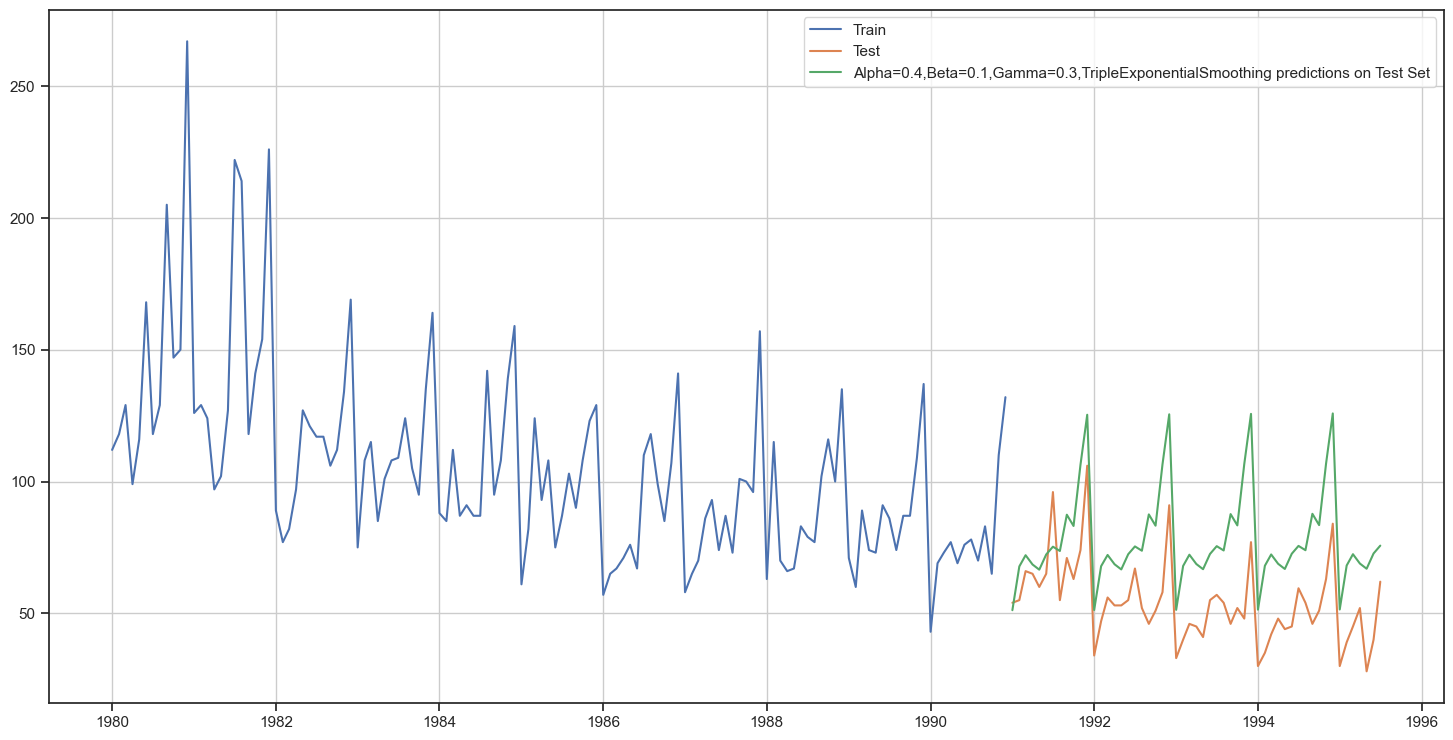

In [234]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [235]:
from statsmodels.tsa.stattools import adfuller

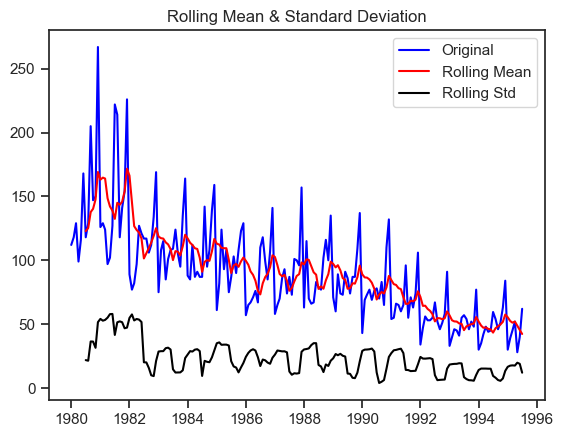

Results of Dickey-Fuller Test:
Test Statistic                  -1.892338
p-value                          0.335674
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [236]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df1['Sales'])

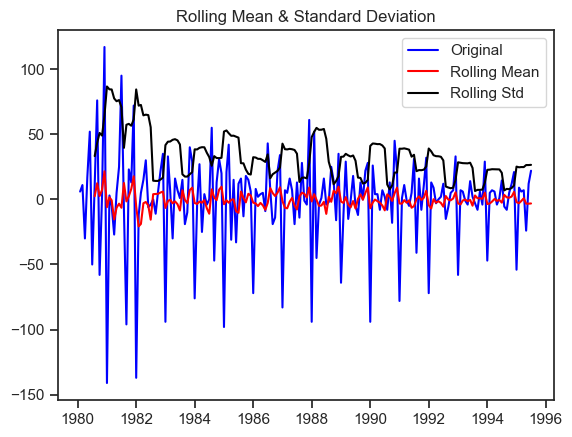

Results of Dickey-Fuller Test:
Test Statistic                -8.032729e+00
p-value                        1.938803e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [237]:
test_stationarity(df1['Sales'].diff().dropna())

In [238]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [239]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [240]:
from statsmodels.tsa.arima.model import ARIMA
for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535752
ARIMA(0, 1, 3) - AIC:1280.5453761734668
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380076
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(1, 1, 3) - AIC:1281.8707223309993
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.5078621868597
ARIMA(2, 1, 2) - AIC:1281.8707222264168


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6956920197993
ARIMA(3, 1, 0) - AIC:1297.4810917271707
ARIMA(3, 1, 1) - AIC:1282.4192776272025
ARIMA(3, 1, 2) - AIC:1283.720740597717
ARIMA(3, 1, 3) - AIC:1278.6543716254587


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [241]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
11  (2, 1, 3)  1274.695692
15  (3, 1, 3)  1278.654372
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376
5   (1, 1, 1)  1280.574230
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
7   (1, 1, 3)  1281.870722
1   (0, 1, 1)  1282.309832
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
12  (3, 1, 0)  1297.481092
8   (2, 1, 0)  1298.611034
4   (1, 1, 0)  1317.350311
0   (0, 1, 0)  1333.154673

In [242]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,3))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Thu, 11 Apr 2024   AIC                           1274.696
Time:                        21:28:21   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.706
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6778      0.084    -20.027      0.000      -1.842      -1.514
ar.L2         -0.7286      0.084     -8.698      0.000      -0.893      -0.564
ma.L1          1.0444      0.602      1.734      0.0

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [243]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

36.41531367205513


In [244]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])
resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192624
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.415314

In [245]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [246]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [247]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207525
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380875


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3122.094709929814
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386566
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635749974


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4600.377507188015
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697538
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945756


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3521.295618942269
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931053
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702789318
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128389


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3545.166222344632
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918327
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383826


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:4016.6067996569886
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324917866
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947167
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302144


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3977.8092859419708
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.598286653575
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461667
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.198825295035


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3659.866464973992
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764789181
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844932517948
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269339551


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3596.563292420797
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054105
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975265002
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617704


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2793.472258065948
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341417
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.540093354174
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913647989


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2864.6948778789306
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.010591225798
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545046409
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679591


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2308.9346705846515
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189374684
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080533305
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528333409


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2132.707041268469
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739093
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646080012
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380557


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3904.9578869923807
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.205136121224
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212936353
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340725


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3449.087924528238
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987059
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996880687
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788253052


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3633.286364182227
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124764617
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.992877234116
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150730020317


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3310.1996331096916
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585712
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257685


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3849.666188727676
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8860786804528
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.408005502533
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948435


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3814.3053827865488
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.098477866423
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661072
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071051


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3493.947921372164
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272573
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573529
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086850925


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3424.6892464013413
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255507
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640548
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063877
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4122.197043968989
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965030336
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135392
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428507052
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:4083.4251685575136
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060842315
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470748
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936875
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3765.460411734405
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439389224
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447841982
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850230854
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3702.1523363366496
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706229
SARIMA(1, 1, 2)x(0, 

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4007.4508977949104
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.77609247209
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.618321124382
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318502400713


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3968.5066195084323
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196706177
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597871507601
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6869094095151


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3654.616079223014
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801448816
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312809895054
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390251104789


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3591.4601200859806
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316312
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849747820542
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.41301051262


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3916.873464479272
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487675954
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950946942882
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291589114


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3875.6199415101555
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687620782469
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955659092194
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886593670963


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3555.583139391557
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903133946029
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310148240512
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467948028675


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2703.6763510503283
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471135
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829955
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4166.3927111084395
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575923
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.786319864106
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559064


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4125.001824593934
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645506
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801383884
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280773


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3803.6438488356416
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407409156
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.047263790333
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.498819137333


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3949.8896393489235
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231795417
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.20934919494
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472089905


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:4001.2607444262812
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.424960110131
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471202442
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822523


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3964.8942665187215
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.518160823023
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369369
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866285761


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3482.8200785488784
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600248502
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259181758
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598887601035


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3688.857836937899
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.910211614671
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598222
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311102911


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3765.9094849287194
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.291271371161
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909351783559
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488808818


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3398.2555763771575
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464440445334
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889437665
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687980906956


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:2973.7385870612325
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712469237
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035434418
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640484247035


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3365.765712487481


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8698571068874
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073333304046
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349284972186


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:4013.4885871071283
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563822742156
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0462155885157
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.948334850062


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3975.592944462128
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301545519
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328091877455
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191799396143


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3697.009948905378
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074207828091
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101472499505
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452487689772


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3613.7617462644034
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641505
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042233
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118006
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4168.39271110844
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456726169
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.556972678441
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996305025
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:4129.182428434468
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.720319788809
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976514
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472881
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3807.7771903529483
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527301
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167661929
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017179479


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3565.2357091875556
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709434
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.689464122285
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547279


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:4003.2607444262817
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149136512247
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837554435277
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384278


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3966.8942665187515
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459899086
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208538204
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523166965


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3563.3775368975816
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990372219
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300796047
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002869457885


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3817.4901809519156
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652495399
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092402391124
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980110725879


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:4096.4168637202265
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211382861
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.126051976207
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.287509493047
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3924.7481098747207
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3182508603063
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441198165
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1430561955516


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3890.934854905224
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505639609002
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462206677822
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809383661546


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3994.529857143365
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385976066826
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.539764621745
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3340194243222


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3989.660478031365
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8548784201573
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380161755
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483664146653
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3956.197384254894
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711764609
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217098911478
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595715452645
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3649.9149925715124
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.561018494656
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690410021893
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316163616612
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2471.5475830007927


C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [248]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400287
238  (3, 1, 2)  (3, 0, 2, 12)  774.880938
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [249]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Thu, 11 Apr 2024   AIC                            774.400
Time:                                         21:33:39   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

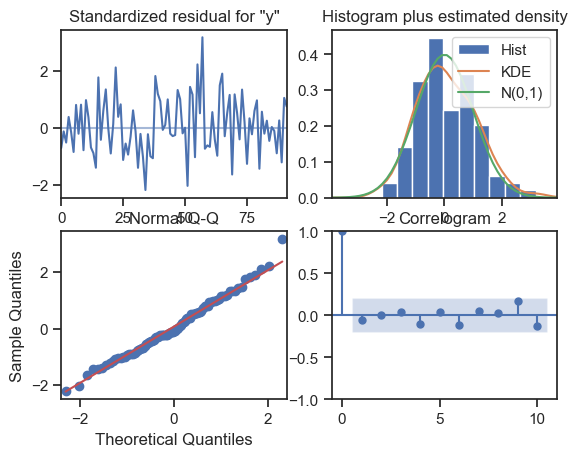

In [250]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [251]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  55.234397  13.906781      27.977606      82.491188
1  68.122440  13.990191      40.702169      95.542711
2  67.908290  14.011219      40.446806      95.369775
3  66.785501  14.098543      39.152865      94.418138
4  69.760573  14.107902      42.109593      97.411553

In [252]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

18.534956002841717


In [253]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,1),(3,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192624
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.415314
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.534956

In [254]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

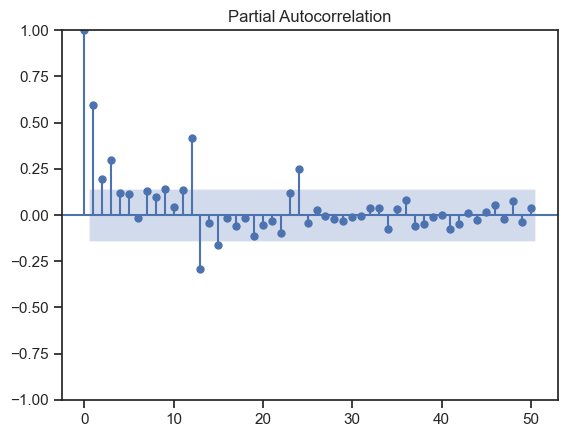

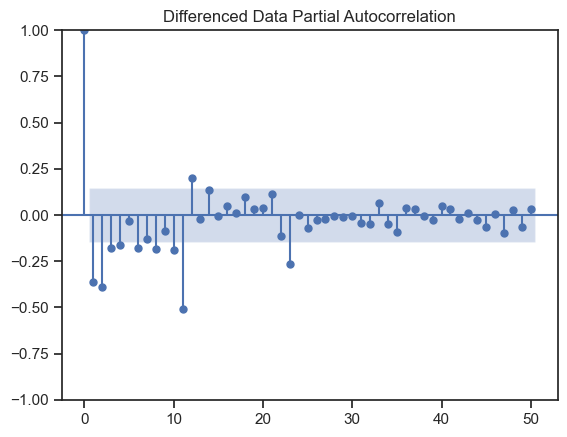

In [255]:
plot_pacf(df1['Sales'],lags=50)
plot_pacf(df1['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

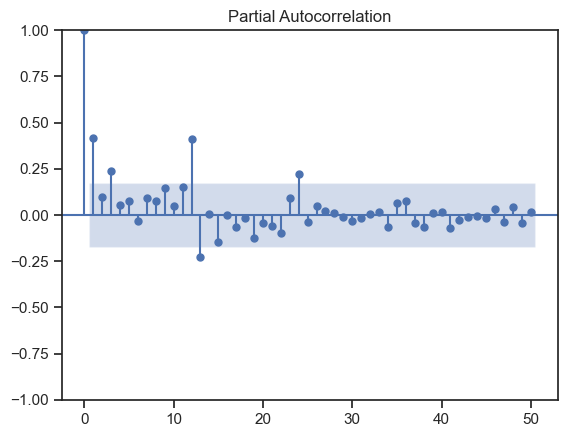

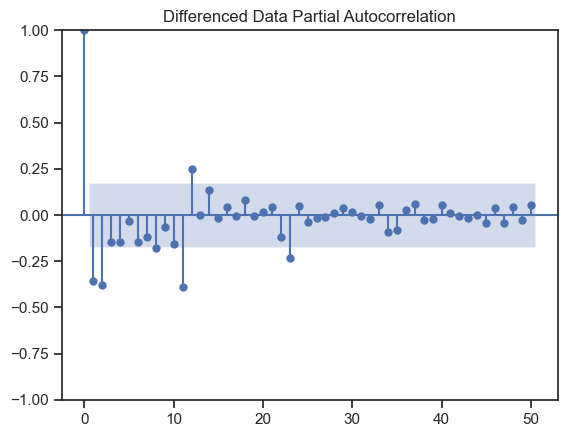

In [256]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [257]:
manual_ARIMA = ARIMA(train['Sales'], order=(2,1,2))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Thu, 11 Apr 2024   AIC                           1281.871
Time:                        21:33:55   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


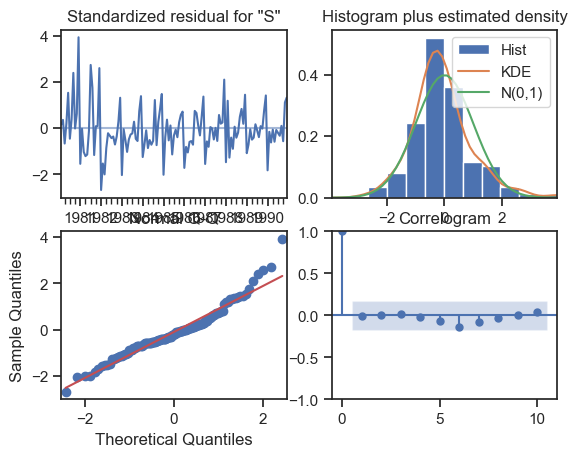

In [258]:
results_manual_ARIMA.plot_diagnostics();

In [259]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 36.473224886646065


In [260]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192624
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.415314
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.534956
ARIMA(3,1,3)                                        36.473225

In [261]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [262]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -538.016
Date:                            Thu, 11 Apr 2024   AIC                           1094.031
Time:                                    21:34:09   BIC                           1119.044
Sample:                                         0   HQIC                          1104.188
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5493      0.228     -2.410      0.016      -0.996      -0.103
ar.L2         -0.0744      0.099   

In [263]:
SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0  (3, 1, 3)  (3, 0, 3, 12)  1094.031391

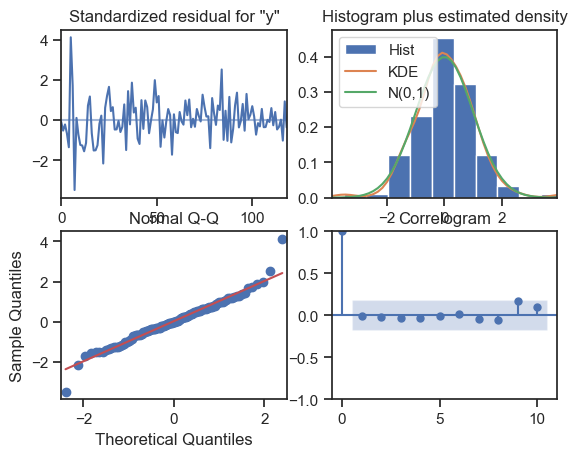

In [264]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [265]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  38.866127  21.080237      -2.450379      80.182633
1  65.281683  21.893762      22.370698     108.192669
2  60.208578  21.939717      17.207522     103.209634
3  59.303133  22.254170      15.685762     102.920504
4  60.595523  22.300415      16.887512     104.303533

In [266]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

14.977176657568455


In [267]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(2,1,2)(2,1,2,12),Manual_SARIMA'])
resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192624
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.415314
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.534956
ARIMA(3,1,3)                                        36.473225
(2,1,2)(2,1,2,12),Manual_SARIMA                     14.977177

In [268]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
(2,1,2)(2,1,2,12),Manual_SARIMA                     14.977177
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.534956
Auto_ARIMA                                          36.415314
Alpha=0.1,SimpleExponentialSmoothing                36.429535
ARIMA(3,1,3)                                        36.473225
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192624
Linear Regression                                   51.080941
Simple Average Model                                53.049755
Naive Model                                         79.304391

In [269]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [270]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [271]:
TES_train = df.copy()

In [272]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [273]:
future_predictions['Sales_Predictions']=prediction
future_predictions

Sales_Predictions
1995-08-01        1961.135966
1995-09-01        2755.845496
1995-10-01        4350.148046
1995-11-01        6467.199378
1995-12-01       11562.330237
1996-01-01        3274.957784
1996-02-01        4445.687620
1996-03-01        5816.912912
1996-04-01        6431.148531
1996-05-01        6324.013903
1996-06-01        6307.062803
1996-07-01        8098.263479

In [274]:
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI    prediction      upper_ci
1995-08-01    716.392152   1961.135966   3205.879779
1995-09-01   1511.101682   2755.845496   4000.589309
1995-10-01   3105.404233   4350.148046   5594.891860
1995-11-01   5222.455564   6467.199378   7711.943191
1995-12-01  10317.586423  11562.330237  12807.074050

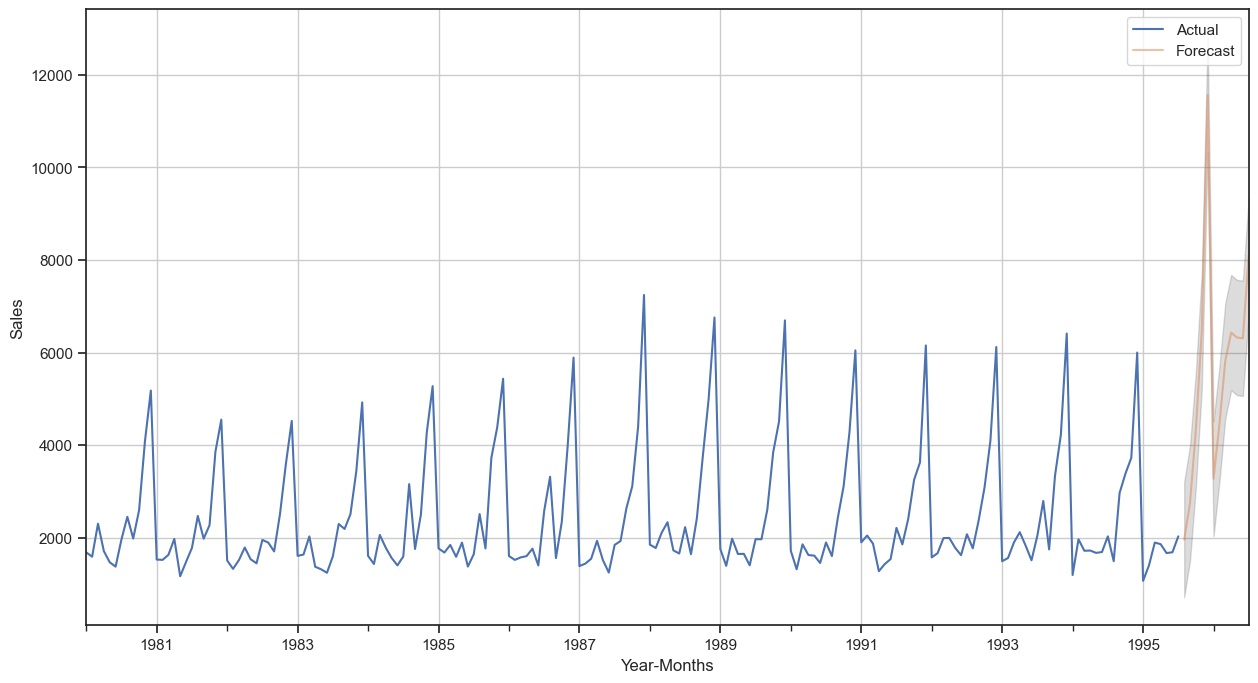

In [275]:
axis = df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()